# Exploration of `Where we Move` Game

in this notebook, I am going to read, clean and plot the initial charts for the game sessions being held on IHE Delft and Municipality. the further steps are being explained in next steps.

#### 1- reading and take an overview to the data collected

importing the liberaries

In [1]:
%matplotlib inline

import pandas as pd
import os 
import palettable as pl
import seaborn as sns
from seaborn import palplot
import matplotlib.pyplot as plt

reading the csv data (firstly exported from SPSS to csv format)
important; to be easy for third person reviewing my model, she would be accessible to the codes below, if she can upload the attached files to this model (eg. csv file) via her own device or pc. I am using the dynamic path, so you can open and start running this model, just when you coppied the csv, next to your python file location.

In [2]:
#write down your file location in formatted below (be careful of backslash instead of dashes)

#path = 'D:\WaterEng\TUDelft\EPACourses\9- Capita Selecta (Where do we move)\week 6'


converting the xlsx to csv

In [5]:
game = pd.read_excel('Game data.xlsx')

game.to_csv('Game data.csv', index=False)

In [6]:
game = pd.read_csv('Game data.csv')

game

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3.0,NaN,1,4.0,180,105,300,80,...,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1,2,1.0,3.0,1,NaN,180,105,300,80,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2,2,1,5.0,NaN,2,2.0,120,65,200,50,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2,2,2.0,3.0,2,2.0,120,65,200,50,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
4,2,3,3.0,2.0,2,2.0,120,65,200,50,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,53,1,3.0,3.0,1,2.0,80,40,130,15,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
216,53,2,3.0,1.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
217,53,3,3.0,2.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
218,53,4,2.0,2.0,1,2.0,80,40,130,15,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


the data is consists of `53 individual` players, played the game for at least 3 to 5 rounds. data collected from IHE delft UNESCO institute for water education and municipality staffs.

In [7]:
game.dtypes

PlayerID                      int64
Round                         int64
Question1                   float64
Question2                   float64
Membership                    int64
GameTactic                  float64
Income                        int64
LivingCost                    int64
MaxMortgage                   int64
StartingSavings               int64
IncreaseSatisfaction          int64
PreferredHouseRating          int64
ActualHouseRating             int64
Savings                     float64
BeginSatisfaction             int64
EndSatisfaction             float64
Damage                        int64
SpendableIncome             float64
PayingDebt                  float64
PayingSatisfaction          float64
PayingMeasures              float64
RiverFloodedArea            float64
RiverFloodedHouse           float64
RainFloodedArea             float64
RainFloodedHouse            float64
Address                      object
GreenGarden                 float64
AutomaticSteelWalls         

Here there are several columns with NAN values inside. while I have already checked them through SPSS, `they used to be 0 values` in SPSS sheet, but now while exported to csv, is being shown as `NAN`.

lets jump into an new step tho.

#### 2- cleaning the data typed properly to further operation

the `best way` to tackle such data is to `convert them to 0 values`, since numbers are sth doable within pandas, but NANs are not!

so here, I am trying to convert NANs ro 0 values.

In [8]:
columns_to_fill = ['Address','Question1', 'Question2', 'GameTactic','Savings','EndSatisfaction','SpendableIncome','PayingDebt','PayingSatisfaction','PayingMeasures','RiverFloodedArea','RiverFloodedHouse','RainFloodedArea','RainFloodedHouse','GreenGarden','AutomaticSteelWalls','Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel','Riverfloodlag','RainFloodlag','GreenGarden_Lead','Automatic_Lead','Waterpump_Lead','Bulkhead_Lead','RiseGround_Lead','Waterproof_Lead','Sandbag_Lead','Rainbarrel_Lead'] 

game[columns_to_fill] = game[columns_to_fill].fillna(0)

In [9]:
game.head()

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3.0,0.0,1,4.0,180,105,300,80,...,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1,2,1.0,3.0,1,0.0,180,105,300,80,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2,2,1,5.0,0.0,2,2.0,120,65,200,50,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2,2,2.0,3.0,2,2.0,120,65,200,50,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
4,2,3,3.0,2.0,2,2.0,120,65,200,50,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [10]:
game.dtypes

PlayerID                      int64
Round                         int64
Question1                   float64
Question2                   float64
Membership                    int64
GameTactic                  float64
Income                        int64
LivingCost                    int64
MaxMortgage                   int64
StartingSavings               int64
IncreaseSatisfaction          int64
PreferredHouseRating          int64
ActualHouseRating             int64
Savings                     float64
BeginSatisfaction             int64
EndSatisfaction             float64
Damage                        int64
SpendableIncome             float64
PayingDebt                  float64
PayingSatisfaction          float64
PayingMeasures              float64
RiverFloodedArea            float64
RiverFloodedHouse           float64
RainFloodedArea             float64
RainFloodedHouse            float64
Address                      object
GreenGarden                 float64
AutomaticSteelWalls         

In [11]:
columns_to_convert = ['Question1', 'Question2', 'GameTactic','Savings','EndSatisfaction','SpendableIncome','PayingDebt','PayingSatisfaction','PayingMeasures','RiverFloodedArea','RiverFloodedHouse','RainFloodedArea','RainFloodedHouse','GreenGarden','AutomaticSteelWalls','Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel','Riverfloodlag','RainFloodlag','GreenGarden_Lead','Automatic_Lead','Waterpump_Lead','Bulkhead_Lead','RiseGround_Lead','Waterproof_Lead','Sandbag_Lead','Rainbarrel_Lead'] 

game[columns_to_convert] = game[columns_to_convert].astype(int)

In [12]:
game.dtypes

PlayerID                     int64
Round                        int64
Question1                    int32
Question2                    int32
Membership                   int64
GameTactic                   int32
Income                       int64
LivingCost                   int64
MaxMortgage                  int64
StartingSavings              int64
IncreaseSatisfaction         int64
PreferredHouseRating         int64
ActualHouseRating            int64
Savings                      int32
BeginSatisfaction            int64
EndSatisfaction              int32
Damage                       int64
SpendableIncome              int32
PayingDebt                   int32
PayingSatisfaction           int32
PayingMeasures               int32
RiverFloodedArea             int32
RiverFloodedHouse            int32
RainFloodedArea              int32
RainFloodedHouse             int32
Address                     object
GreenGarden                  int32
AutomaticSteelWalls          int32
Waterpump           

and the type of elements in dataframe are not integer, which later makes mistakes for claculation. first I need them to be integer type

In [13]:
game.dtypes

PlayerID                     int64
Round                        int64
Question1                    int32
Question2                    int32
Membership                   int64
GameTactic                   int32
Income                       int64
LivingCost                   int64
MaxMortgage                  int64
StartingSavings              int64
IncreaseSatisfaction         int64
PreferredHouseRating         int64
ActualHouseRating            int64
Savings                      int32
BeginSatisfaction            int64
EndSatisfaction              int32
Damage                       int64
SpendableIncome              int32
PayingDebt                   int32
PayingSatisfaction           int32
PayingMeasures               int32
RiverFloodedArea             int32
RiverFloodedHouse            int32
RainFloodedArea              int32
RainFloodedHouse             int32
Address                     object
GreenGarden                  int32
AutomaticSteelWalls          int32
Waterpump           

datatypes are now mostly in integer format. which is convinient for calculation and functions.

What now is required, is to filter dataframe based on implemented private measures;

In [14]:
game.head()

,PlayerID,Round,Question1,Question2,Membership,GameTactic,Income,LivingCost,MaxMortgage,StartingSavings,...,Riverfloodlag,RainFloodlag,GreenGarden_Lead,Automatic_Lead,Waterpump_Lead,Bulkhead_Lead,RiseGround_Lead,Waterproof_Lead,Sandbag_Lead,Rainbarrel_Lead
0,1,1,3,0,1,4,180,105,300,80,...,0,0,1,2,2,2,2,2,2,2
1,1,2,1,3,1,0,180,105,300,80,...,2,2,2,2,2,2,1,2,2,2
2,2,1,5,0,2,2,120,65,200,50,...,2,2,1,2,2,2,2,2,2,2
3,2,2,2,3,2,2,120,65,200,50,...,2,2,2,2,2,2,2,2,2,1
4,2,3,3,2,2,2,120,65,200,50,...,2,1,2,2,2,2,2,2,2,2


In [15]:
private_measures = game[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures = private_measures.sort_values(by='PlayerID', ascending=True)
private_measures

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
0,1,1,1,2,2,2,2,1,2,2,2
1,1,1,2,1,2,2,2,2,2,2,2
2,1,2,1,2,2,2,2,1,2,2,2
3,1,2,2,1,2,2,2,2,2,2,2
4,1,2,3,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
218,7,53,4,2,2,2,2,2,2,2,2
215,7,53,1,2,2,2,2,2,2,2,2
216,7,53,2,2,2,2,2,2,2,2,2
217,7,53,3,2,2,2,2,2,2,2,2


I realised in data collected from SPSS, (filled out previously by Jarno) that there are implemented private measures by players and are indicated by numbers(1). the rest of numbers are  (2) which doesn't make sense to further analysis. those are literally means that there was no implemented measure. lets exchange numbers 2 with 0

In [16]:
#selecting only the columns which are private measures
columns_to_replace = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']

# Replace 2 with 0 only in the specified columns
private_measures[columns_to_replace] = private_measures[columns_to_replace].replace(2, 0)
private_measures

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
0,1,1,1,0,0,0,0,1,0,0,0
1,1,1,2,1,0,0,0,0,0,0,0
2,1,2,1,0,0,0,0,1,0,0,0
3,1,2,2,1,0,0,0,0,0,0,0
4,1,2,3,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
218,7,53,4,0,0,0,0,0,0,0,0
215,7,53,1,0,0,0,0,0,0,0,0
216,7,53,2,0,0,0,0,0,0,0,0
217,7,53,3,0,0,0,0,0,0,0,0


the data frame is now prepared to operate sum function. we need it later

### 3- analysing the data

I want to see an overall overview of the implemented private measures by players. thats only a summation of columns `(applied measure)`

In [17]:
column_sums = private_measures[columns_to_replace].sum()
column_sums

GreenGarden                 23
AutomaticSteelWalls         10
Waterpump                   12
Bulkhead                    19
RiseGroundLevel             18
WaterproofWallsandFloors     9
Sandbags                    26
Rainbarrel                  17
dtype: int64

the data matched with table 12 of thesis outcome! here is the table from thesis;


In [18]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


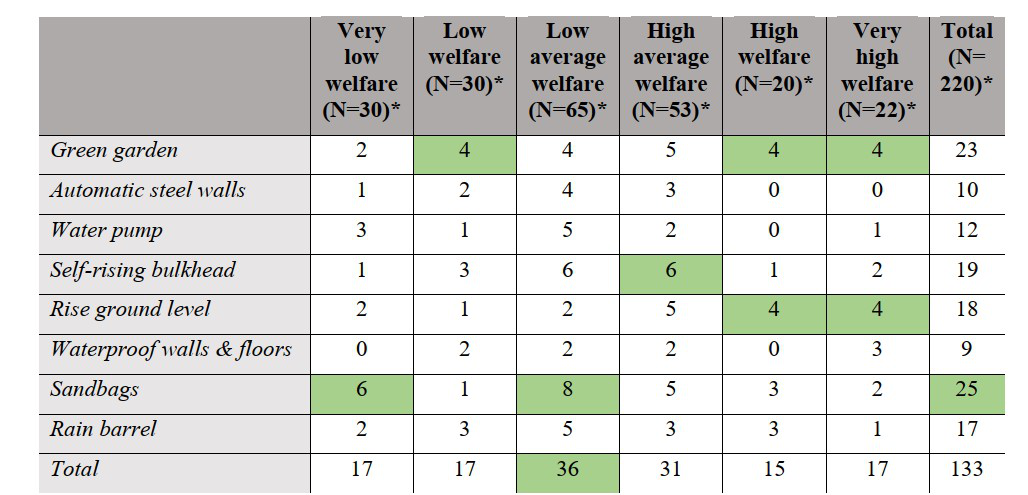

In [19]:
from PIL import Image
from IPython.display import display

image_path = 'D:/TUDelft/EPACourses/9- Capita Selecta (Where do we move)/Week 7/Table12.jpg'  
image = Image.open(image_path)
display(image)

From reading the thesis, I realized that there are 7 tables which these data has been gained from. And the total number of players are 53. So approximately there are 8 players per table. 
Now for carrying out the data analytic of implemented private flood measures, I need the table rounds indicator in the data sheet. This is clearly shown in `Game column`. Now trying to sort upon different rounds played, by every each player.


the below explanation is all about 
## `table 1`


`to keep in mind`: the several attempts have been done to reach the final desirable outcome. follow the steps to see the process

In [20]:
filtered_game1 = private_measures[private_measures['Game'] == 1]
filtered_game1.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
0,1,1,1,0,0,0,0,1,0,0,0
1,1,1,2,1,0,0,0,0,0,0,0
2,1,2,1,0,0,0,0,1,0,0,0
3,1,2,2,1,0,0,0,0,0,0,0
4,1,2,3,0,0,0,0,0,0,0,1


Assuming 'filtered_game1' contains columns for 'PlayerID' and each private measure
 and Summarize the data by counting each private measure per player

In [24]:
sns.set_palette("tab10")

# Plotting the stacked bar chart
# Note: Since we're setting the palette globally with seaborn, we don't need to use `cmap` here.
grouped_game1.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Private Measures Implemented per Player in Game 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

NameError: name 'grouped_game1' is not defined

In [25]:

measures_columns = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead', 
                    'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']
grouped_data1 = filtered_game1.groupby('PlayerID')[measures_columns].sum()

In [26]:
melted_data = grouped_data1.reset_index().melt(id_vars='PlayerID', value_vars=measures_columns, 
                                              var_name='Measure', value_name='Count')

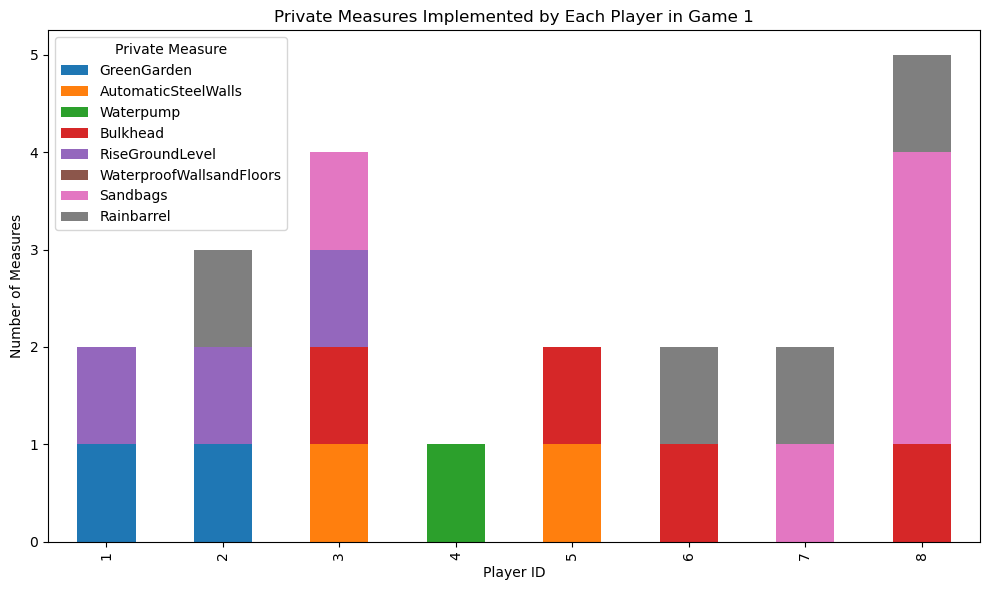

In [27]:
# Plotting the stacked bar chart
grouped_data1.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customizing the plot
plt.title('Private Measures Implemented by Each Player in Game 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure')

plt.tight_layout()
plt.show()

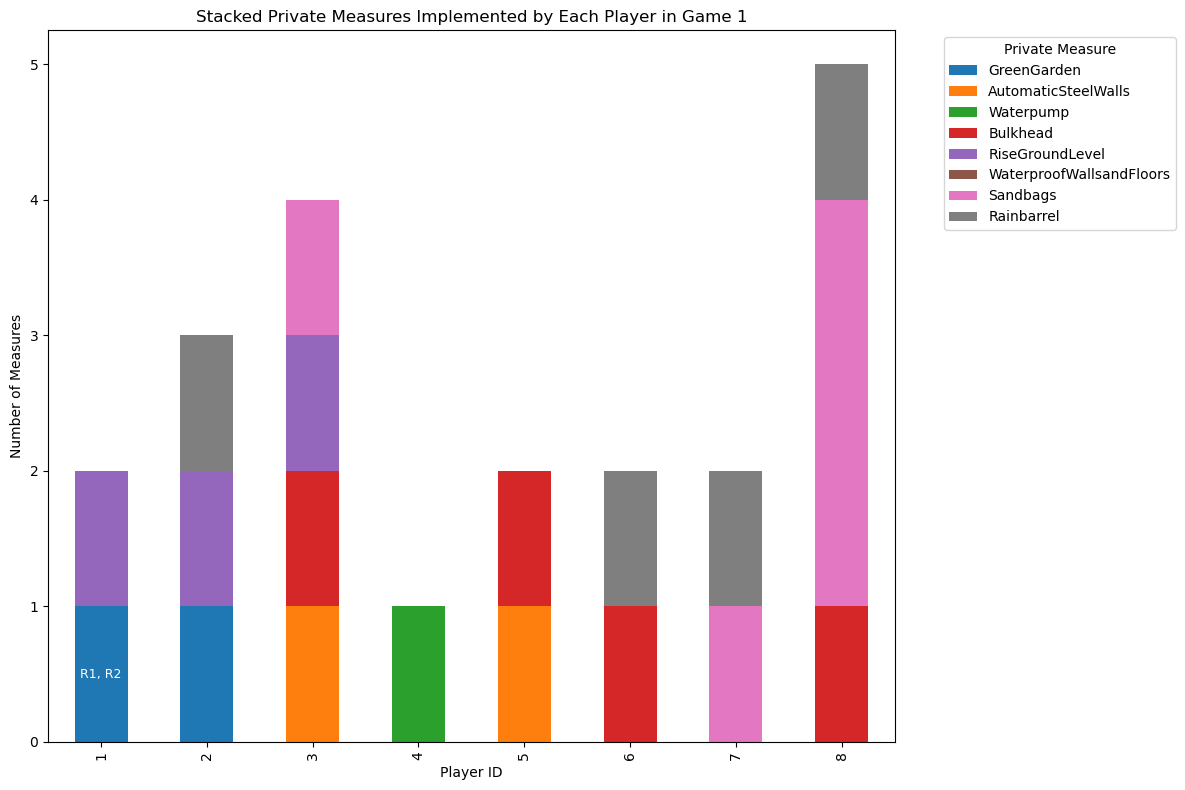

In [28]:
measures = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead',  
            'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']

# Assuming 'filtered_game1' is your pre-existing DataFrame which includes these measures
# and also includes columns 'PlayerID' and 'Round'

# Example of generating a count of each measure implemented by player in each round
# This assumes binary (0 or 1) values for each measure indicating whether it was implemented
grouped_data1 = filtered_game1.groupby('PlayerID')[measures].sum()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data1.plot(kind='bar', stacked=True, ax=ax)

plt.title('Stacked Private Measures Implemented by Each Player in Game 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# To annotate with round information, we need round data associated with each measure for each player
# This requires a detailed mapping from your data analysis, not provided here
# The following is a placeholder for demonstration purposes and needs to be adapted based on your dataset
round_contributions = {
    (1, 'GreenGarden'): "R1, R2",
    (2, 'AutomaticSteelWalls'): "R3",
    (3, 'Waterpump'): "R2, R3",
    # Add more based on your data
}

# Dummy data for demonstration of annotating bars with rounds; adapt as needed
for player_id in grouped_data1.index:
    for measure in measures:
        if grouped_data1.loc[player_id, measure] > 0:  # Check if the measure was implemented
            # Placeholder for round info; in a real scenario, fetch this from your detailed data
            round_info = round_contributions.get((player_id, measure), "")
            height = grouped_data1.loc[player_id, measure]
            ax.text(player_id - 1, height/2, round_info, ha='center', va='center', color='white', fontsize=9)

plt.tight_layout()
plt.show()


still the round played has not placed on stacked bars properly

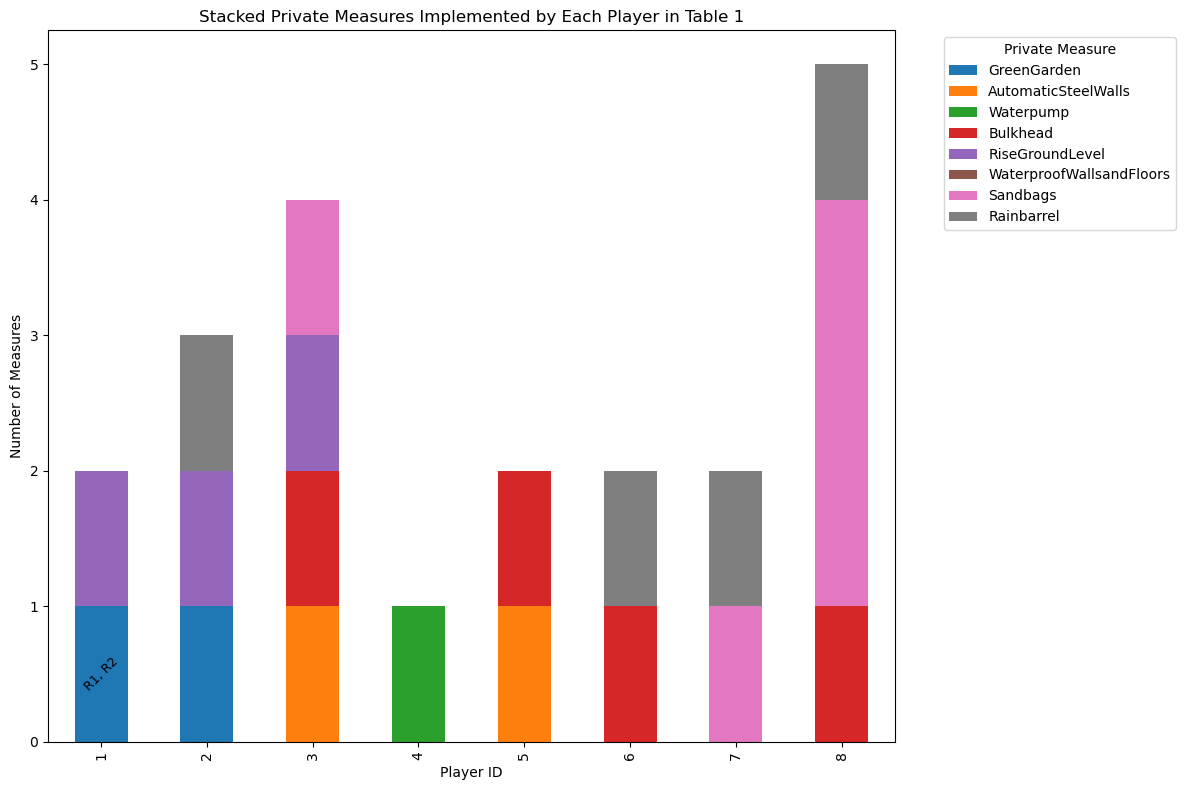

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data1.plot(kind='bar', stacked=True, ax=ax)

plt.title('Stacked Private Measures Implemented by Each Player in Table 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.set_palette("Set3")

for key, rounds in round_contributions.items():
    player_id, measure = key
    # Make sure the player_id and measure are present in the data
    if measure in grouped_data1.columns and player_id in grouped_data1.index:
        # The cumulative height up to the current measure
        cumulative_height_before_measure = grouped_data1.loc[player_id, measures[:measures.index(measure)]].sum()
        # The height of the current measure
        measure_height = grouped_data1.loc[player_id, measure]
        # Calculate the mid-point of the current measure's segment for annotation
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Adjusting player_id for plotting; ensuring it's a numeric index for annotation
        player_index = list(grouped_data1.index).index(player_id)
        
        if measure_height > 0:  # Only annotate if there's a measurable implementation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


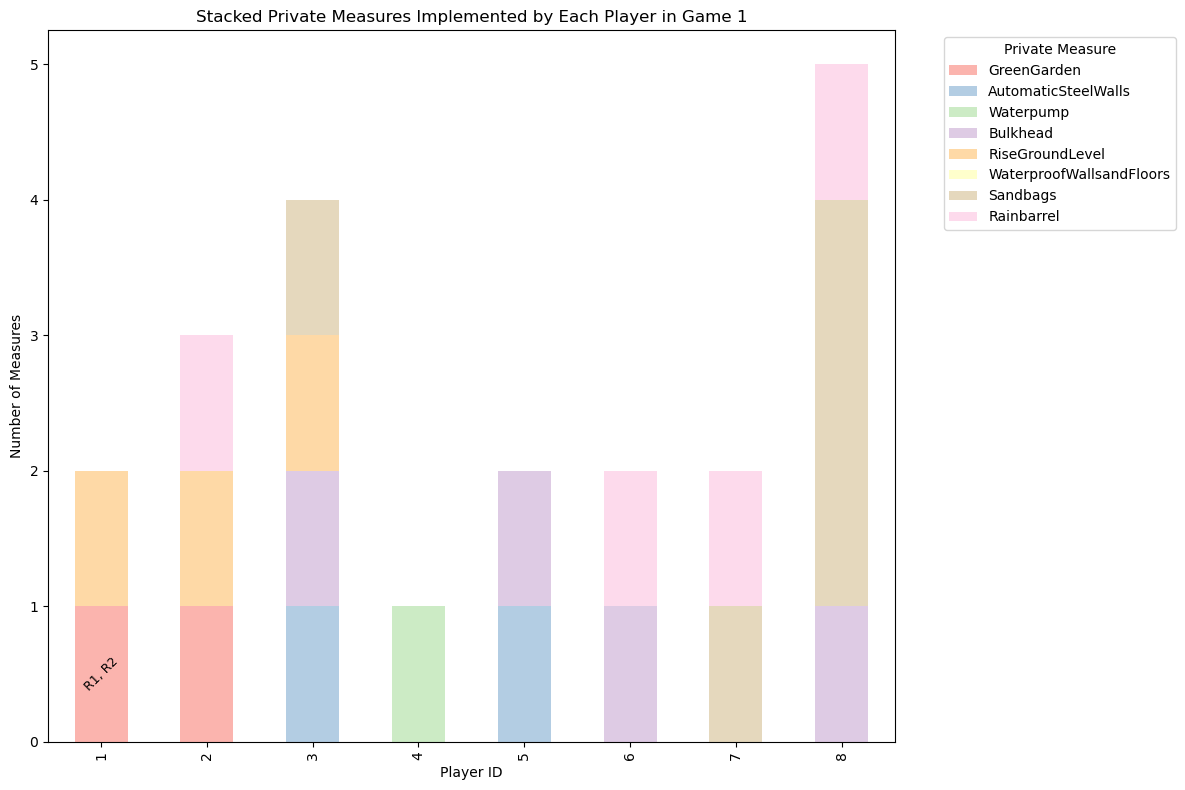

In [30]:
# Option 1: Using Pastel1 for softer tones
sns.set_palette("Set2")

# Option 2: Using tab10 for a balance between vivid and subdued colors (uncomment to use)
sns.set_palette("Pastel1")

# Assuming 'grouped_data1' and 'round_contributions' have been defined as per previous examples

fig, ax = plt.subplots(figsize=(12, 8))
# Apply the chosen palette. Note: sns.color_palette() is used here to directly influence the plot's colors.
grouped_data1.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette())

plt.title('Stacked Private Measures Implemented by Each Player in Game 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations remain the same as in the previous correction
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data1.columns and player_id in grouped_data1.index:
        cumulative_height_before_measure = grouped_data1.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data1.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        player_index = list(grouped_data1.index).index(player_id)
        
        if measure_height > 0:
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


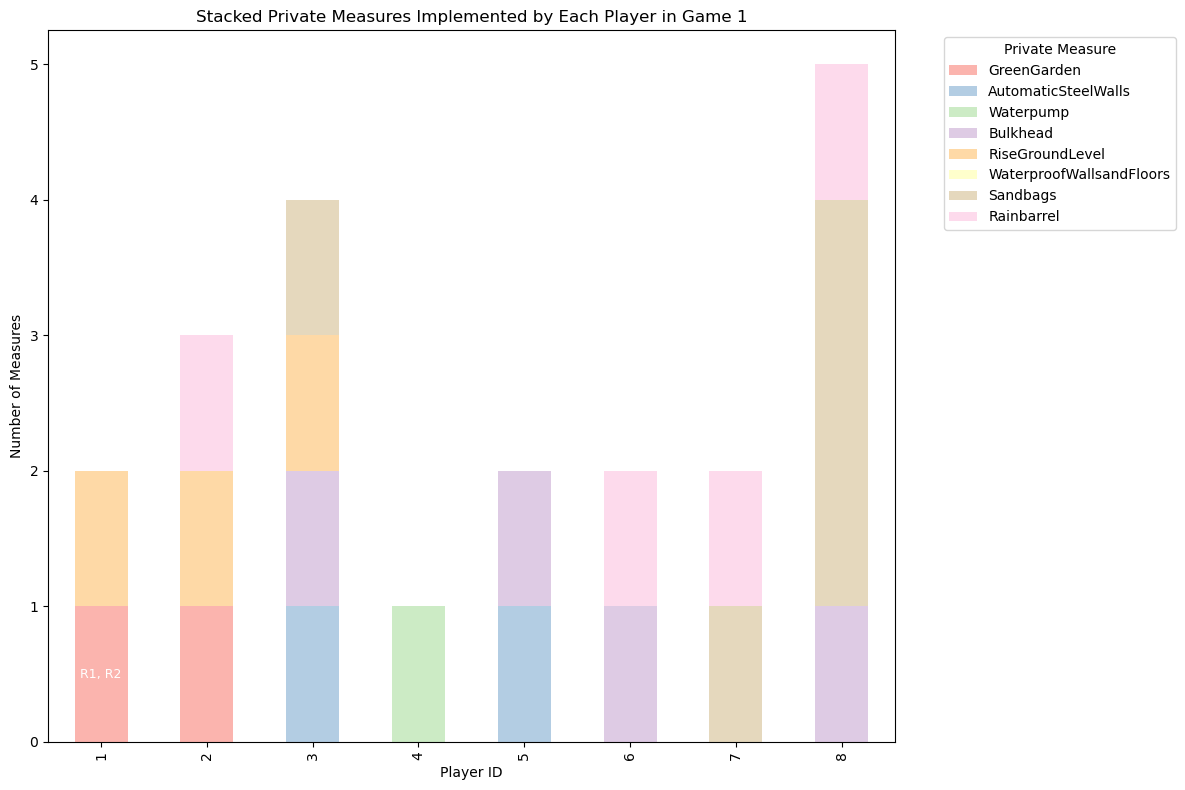

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example measures list
measures = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead',  
            'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']

# Assuming 'filtered_game1' is your pre-existing DataFrame which includes these measures
# and also includes columns 'PlayerID' and 'Round'

# Example of generating a count of each measure implemented by player in each round
# This assumes binary (0 or 1) values for each measure indicating whether it was implemented
grouped_data1 = filtered_game1.groupby('PlayerID')[measures].sum()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data1.plot(kind='bar', stacked=True, ax=ax)

plt.title('Stacked Private Measures Implemented by Each Player in Game 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# To annotate with round information, we need round data associated with each measure for each player
# This requires a detailed mapping from your data analysis, not provided here
# The following is a placeholder for demonstration purposes and needs to be adapted based on your dataset
round_contributions = {
    (1, 'GreenGarden'): "R1, R2",
    (2, 'AutomaticSteelWalls'): "R3",
    (3, 'Waterpump'): "R2, R3",
    # Add more based on your data
}

# Dummy data for demonstration of annotating bars with rounds; adapt as needed
for player_id in grouped_data1.index:
    for measure in measures:
        if grouped_data1.loc[player_id, measure] > 0:  # Check if the measure was implemented
            # Placeholder for round info; in a real scenario, fetch this from your detailed data
            round_info = round_contributions.get((player_id, measure), "")
            height = grouped_data1.loc[player_id, measure]
            ax.text(player_id - 1, height/2, round_info, ha='center', va='center', color='white', fontsize=9)

plt.tight_layout()
plt.show()


TypeError: cannot do slice indexing on Index with these indexers [4] of type int

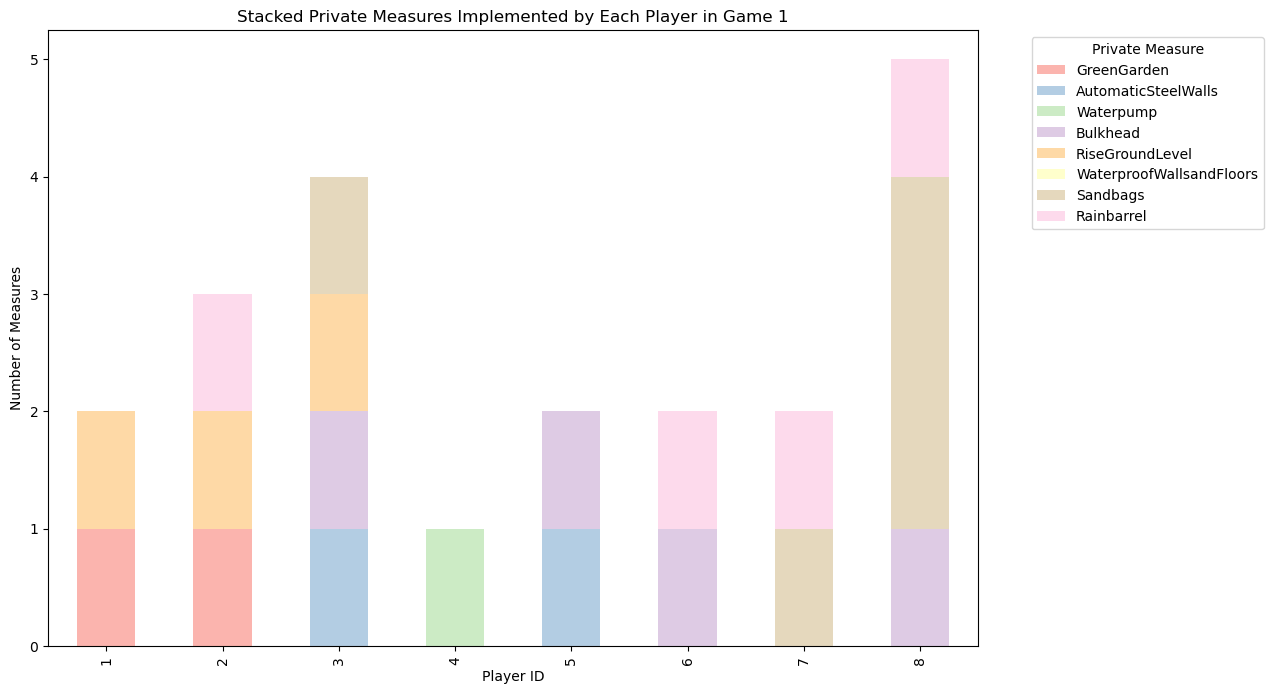

In [32]:
# Initialize an empty dictionary to hold the round contributions
round_contributions = {}

# Iterate over the DataFrame to fill the round_contributions dictionary
# This assumes that 'filtered_game1' includes a 'Round' column and binary indicators for each measure
for index, row in filtered_game1.iterrows():
    player_id = row['PlayerID']
    round_num = row['Round']
    for measure in measures:
        if row[measure] == 1:  # If the measure was implemented
            if (player_id, measure) not in round_contributions:
                round_contributions[(player_id, measure)] = f"R{round_num}"
            else:
                # Append the round number if the measure was implemented in multiple rounds
                round_contributions[(player_id, measure)] += f", R{round_num}"

# Now, plot and annotate the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data1.plot(kind='bar', stacked=True, ax=ax)

plt.title('Stacked Private Measures Implemented by Each Player in Game 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with the round information
for (player_id, measure), rounds in round_contributions.items():
    if player_id in grouped_data1.index and measure in grouped_data1.columns:
        height = grouped_data1.loc[player_id, measure]
        # Find the bar segment's bottom edge
        segment_bottom = sum(grouped_data1.loc[player_id, :measures.index(measure)])
        # Calculate the middle of the segment for vertical positioning of the annotation
        mid_point = segment_bottom + height / 2
        ax.text(player_id - 1, mid_point, rounds, ha='center', va='center', color='white', fontsize=9)

plt.tight_layout()
plt.show()


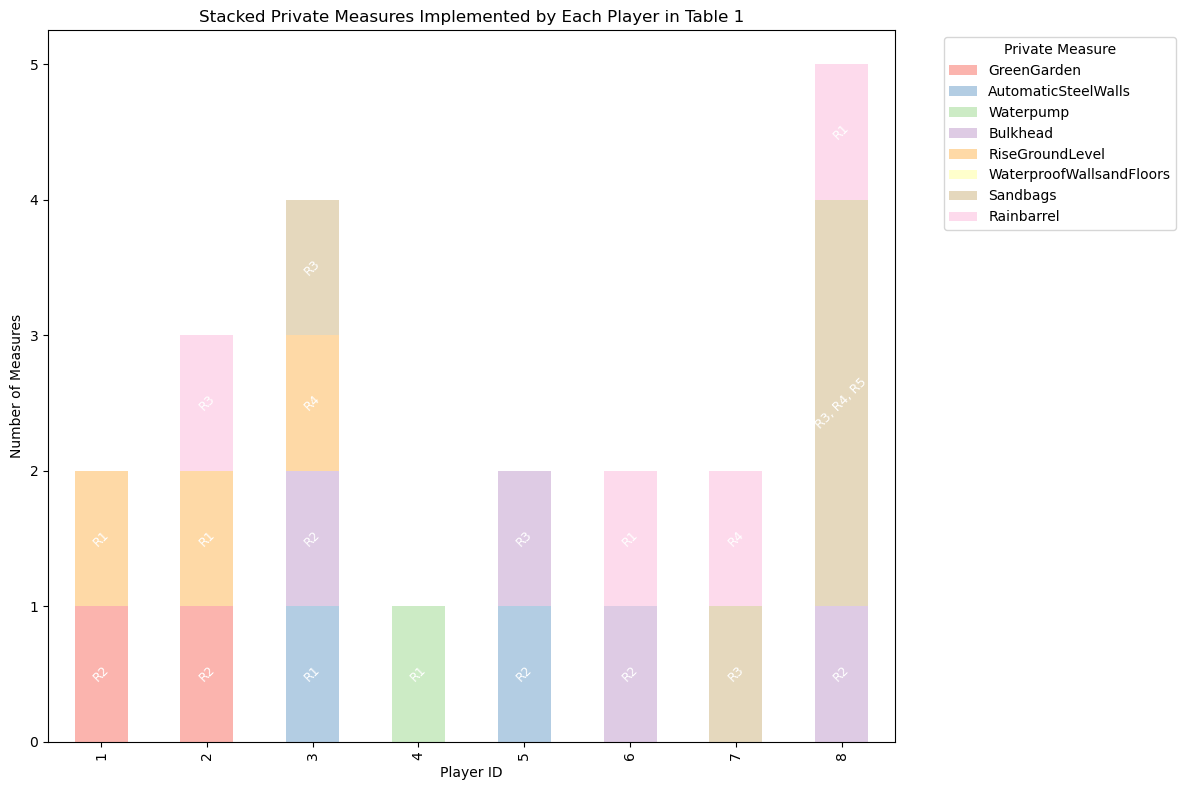

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'grouped_data1' and 'round_contributions' are defined as before
# Assuming 'measures' is the list of measures as before

# Correctly plotting and annotating
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data1.plot(kind='bar', stacked=True, ax=ax)

plt.title('Stacked Private Measures Implemented by Each Player in Table 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

for key, rounds in round_contributions.items():
    player_id, measure = key
    # Make sure the player_id and measure are present in the data
    if measure in grouped_data1.columns and player_id in grouped_data1.index:
        # The cumulative height up to the current measure
        cumulative_height_before_measure = grouped_data1.loc[player_id, measures[:measures.index(measure)]].sum()
        # The height of the current measure
        measure_height = grouped_data1.loc[player_id, measure]
        # Calculate the mid-point of the current measure's segment for annotation
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Adjusting player_id for plotting; ensuring it's a numeric index for annotation
        player_index = list(grouped_data1.index).index(player_id)
        
        if measure_height > 0:  # Only annotate if there's a measurable implementation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='white', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


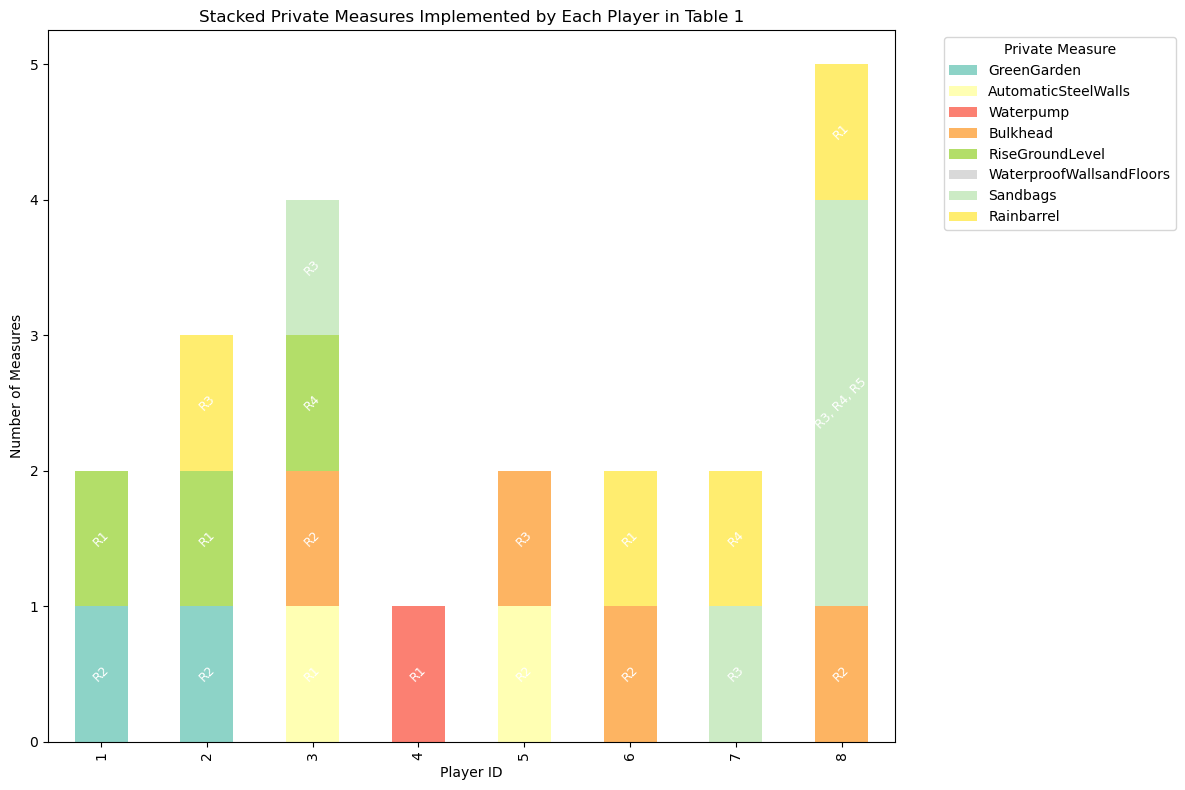

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure seaborn is set up with the desired palette
sns.set_palette("Set3")

# Assuming 'grouped_data1' and 'round_contributions' have been defined as per previous examples
# Continuing from the corrected plotting and annotating approach

fig, ax = plt.subplots(figsize=(12, 8))
# When plotting, specify the color map directly in the plot function
grouped_data1.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Set3", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Table 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations remain the same as in the previous correction
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data1.columns and player_id in grouped_data1.index:
        cumulative_height_before_measure = grouped_data1.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data1.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        player_index = list(grouped_data1.index).index(player_id)
        
        if measure_height > 0:
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='white', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


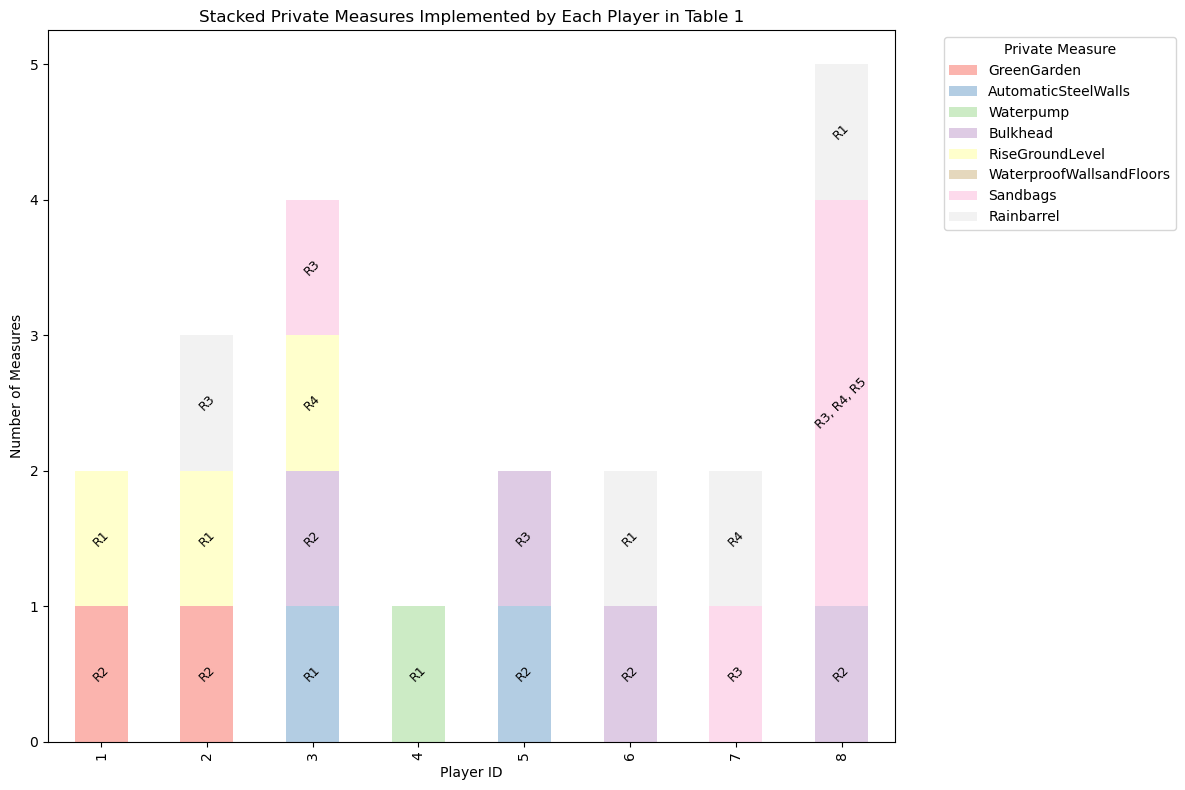

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setting up the Pastel1 palette
sns.set_palette("Pastel1")

# Assuming 'grouped_data1' and 'round_contributions' have been defined
# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data1.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Table 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data1.columns and player_id in grouped_data1.index:
        cumulative_height_before_measure = grouped_data1.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data1.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        player_index = list(grouped_data1.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


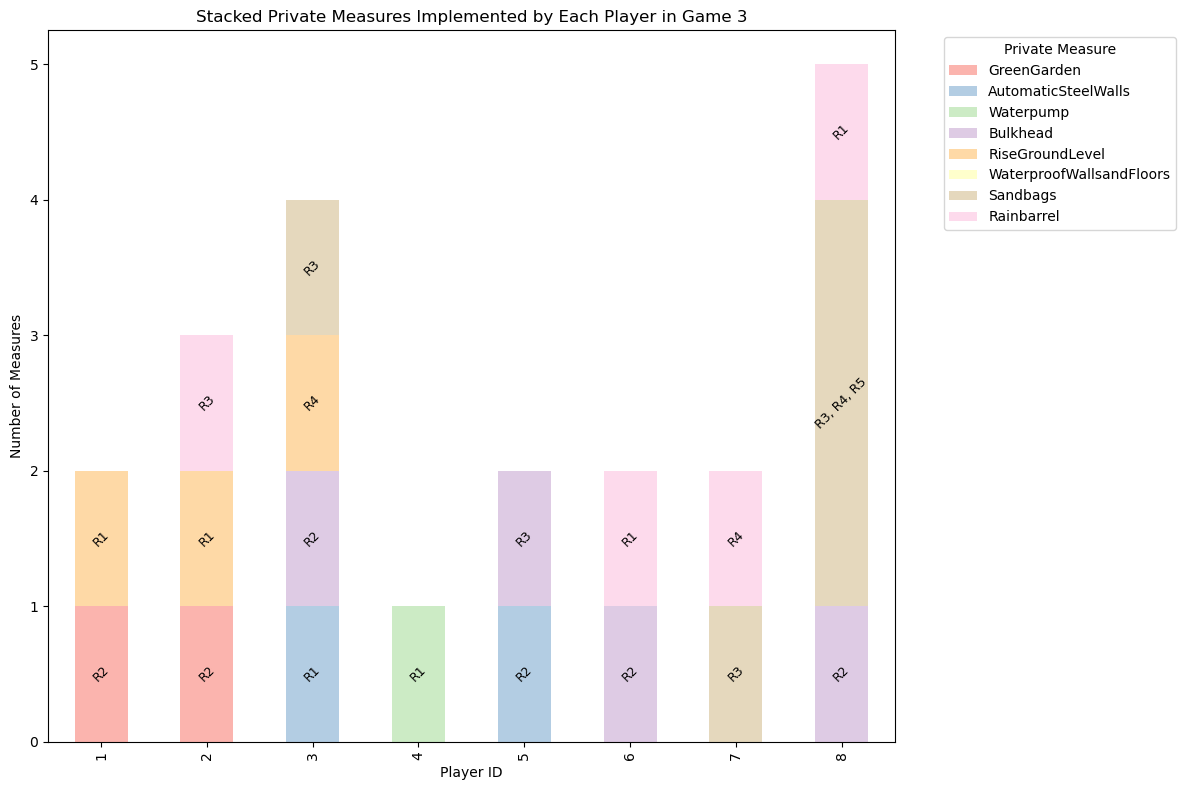

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# Setting up the Pastel1 palette
palette = sns.color_palette("Pastel1", len(measures))  # Ensure enough colors for measures
colormap = ListedColormap(palette)  # Convert color palette to a colormap

# Assuming 'grouped_data3' and 'round_contributions' have been defined
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data1.plot(kind='bar', stacked=True, ax=ax, colormap=colormap)

plt.title('Stacked Private Measures Implemented by Each Player in Game 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for player_id in grouped_data1.index:
    cumulative_height = 0
    for measure in measures:
        key = (player_id, measure)
        if key in round_contributions:
            measure_height = grouped_data1.at[player_id, measure]
            if measure_height > 0:  # Ensure the measure is visible for annotation
                mid_point = cumulative_height + measure_height / 2
                # Get the x-coordinate for the player's bars
                player_index = list(grouped_data1.index).index(player_id)
                x_coordinate = ax.get_xticks()[player_index]
                # Place the annotation
                ax.text(x_coordinate, mid_point, round_contributions[key], ha='center', va='center', color='black', fontsize=9, rotation=45)
            cumulative_height += measure_height

plt.tight_layout()
plt.show()


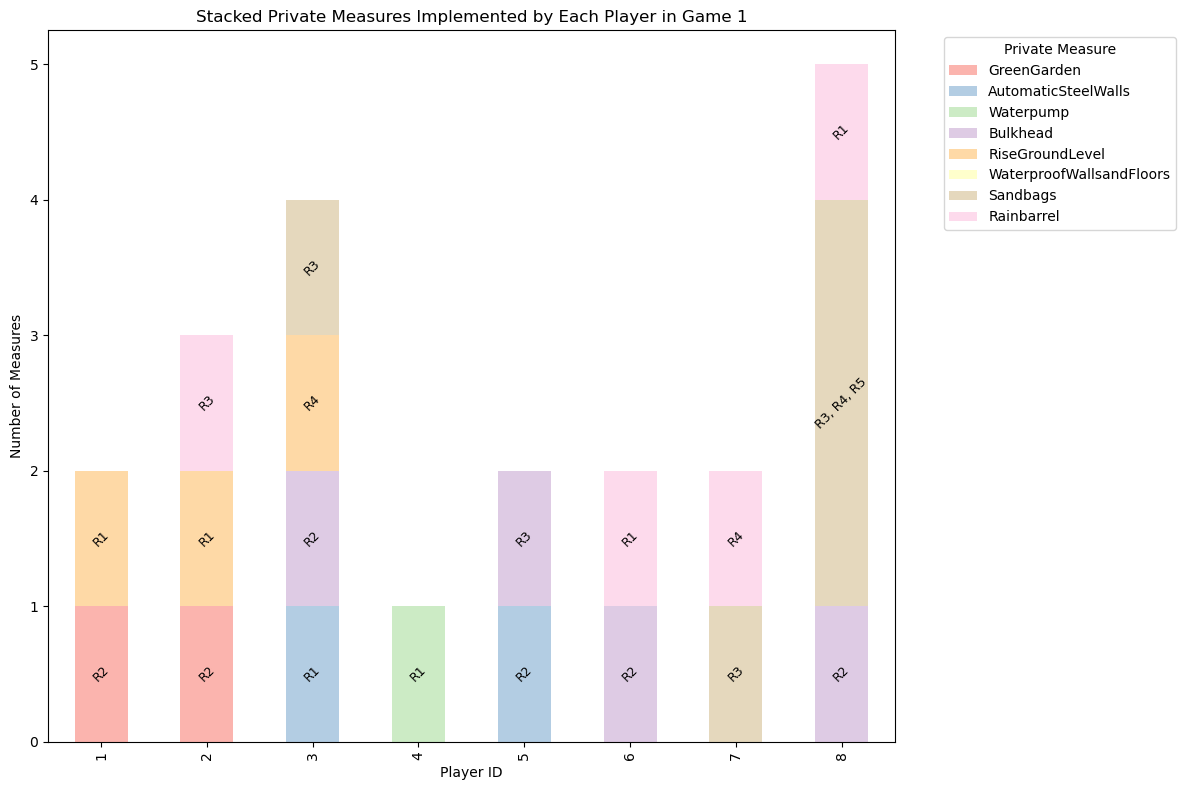

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming that measures, grouped_data1, and round_contributions are properly defined.
# Setting up the Pastel1 palette
palette = sns.color_palette("Pastel1", len(measures))  # Ensuring enough colors for measures
colormap = ListedColormap(palette)  # Converting color palette to a colormap

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data1.plot(kind='bar', stacked=True, ax=ax, colormap=colormap)

plt.title('Stacked Private Measures Implemented by Each Player in Game 1')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Correcting annotation process
for player_id in grouped_data1.index:
    cumulative_height = 0
    for measure in measures:
        if (player_id, measure) in round_contributions:  # Check if there is any contribution
            measure_height = grouped_data1.at[player_id, measure]
            if measure_height > 0:  # Ensure the measure is visible for annotation
                mid_point = cumulative_height + measure_height / 2
                # Get the x-coordinate for the player's bars
                player_index = list(grouped_data1.index).index(player_id)
                x_coordinate = ax.get_xticks()[player_index]
                # Place the annotation
                ax.text(x_coordinate, mid_point, round_contributions[(player_id, measure)], ha='center', va='center', color='black', fontsize=9, rotation=45)
            cumulative_height += measure_height

plt.tight_layout()
plt.show()


### Now problem solved!!! there it is what we were looking for

the below data frame is all data with 
### `table 2`

In [46]:
filtered_game2 = private_measures[private_measures['Game'] == 2]
filtered_game2.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
38,2,9,2,0,0,0,0,0,0,0,0
39,2,9,3,0,0,0,1,0,0,0,0
37,2,9,1,1,0,0,0,0,0,0,0
40,2,10,1,1,0,0,0,1,0,0,0
41,2,10,2,0,0,0,0,0,0,0,1


In [47]:

measures_columns = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead', 
                    'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']
grouped_data2 = filtered_game2.groupby('PlayerID')[measures_columns].sum()

ValueError: 9 is not in list

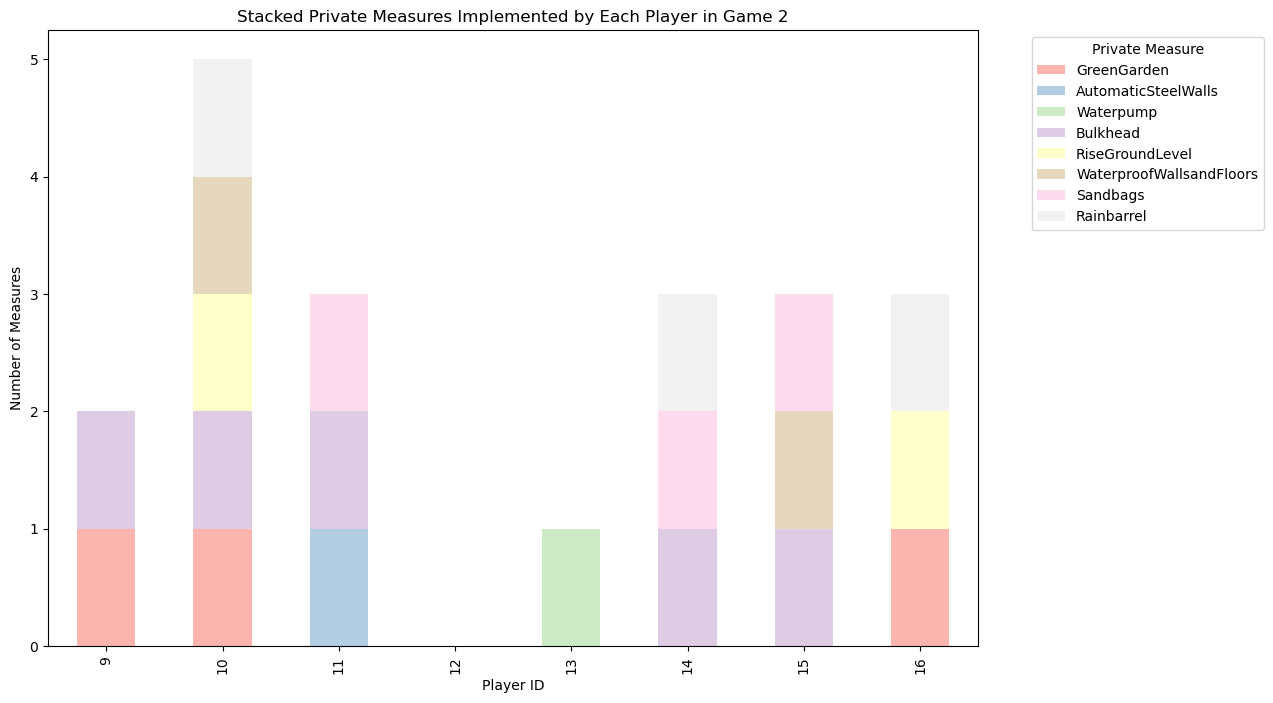

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setting up the Pastel1 palette
sns.set_palette("Pastel1")

# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data2.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Game 2')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data2.columns and player_id in grouped_data2.index:
        cumulative_height_before_measure = grouped_data2.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data2.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        player_index = list(grouped_data1.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


Defining a list, where entails amounts of playerID and the Round who they have implemented the measure. 

In [49]:
for index, row in filtered_game2.iterrows():
    player_id = row['PlayerID']
    round_num = row['Round']
    for measure in measures:
        if row[measure] == 1:  # If the measure was implemented
            if (player_id, measure) not in round_contributions:
                round_contributions[(player_id, measure)] = f"R{round_num}"
            else:
                # Append the round number if the measure was implemented in multiple rounds
                round_contributions[(player_id, measure)] += f", R{round_num}"

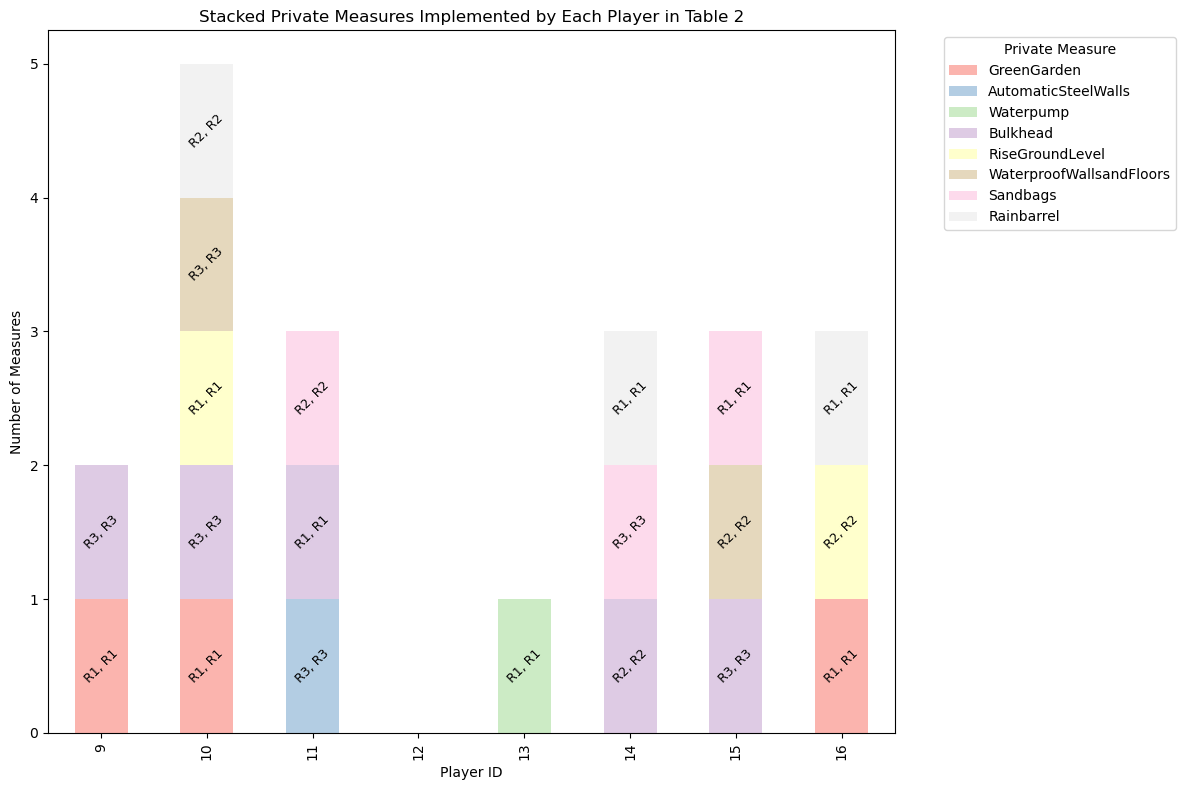

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setting up the Pastel1 palette
sns.set_palette("Pastel1")

# Assuming 'grouped_data2' and 'round_contributions' have been defined
# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data2.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Table 2')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data2.columns and player_id in grouped_data2.index:
        cumulative_height_before_measure = grouped_data2.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data2.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Use grouped_data2 for consistency
        player_index = list(grouped_data2.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


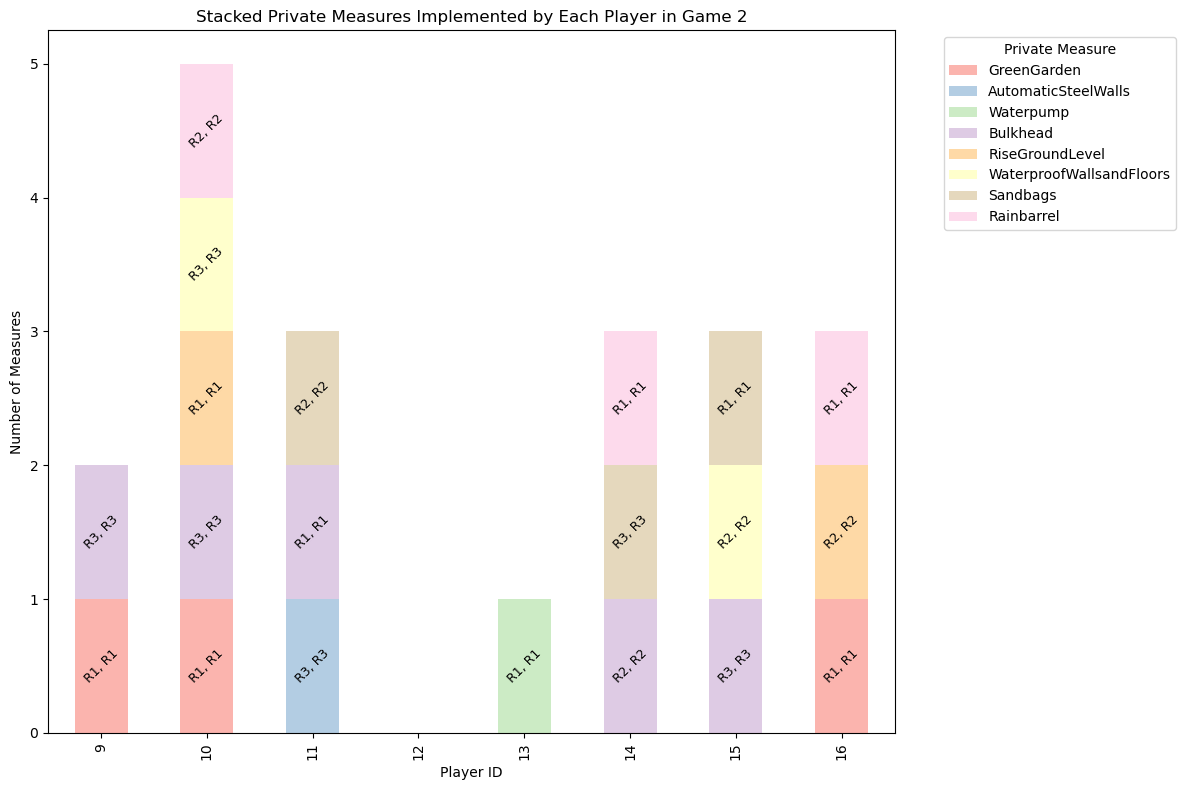

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming that measures, grouped_data1, and round_contributions are properly defined.
# Setting up the Pastel1 palette
palette = sns.color_palette("Pastel1", len(measures))  # Ensuring enough colors for measures
colormap = ListedColormap(palette)  # Converting color palette to a colormap

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data2.plot(kind='bar', stacked=True, ax=ax, colormap=colormap)

plt.title('Stacked Private Measures Implemented by Each Player in Game 2')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Correcting annotation process
for player_id in grouped_data2.index:
    cumulative_height = 0
    for measure in measures:
        if (player_id, measure) in round_contributions:  # Check if there is any contribution
            measure_height = grouped_data2.at[player_id, measure]
            if measure_height > 0:  # Ensure the measure is visible for annotation
                mid_point = cumulative_height + measure_height / 2
                # Get the x-coordinate for the player's bars
                player_index = list(grouped_data2.index).index(player_id)
                x_coordinate = ax.get_xticks()[player_index]
                # Place the annotation
                ax.text(x_coordinate, mid_point, round_contributions[(player_id, measure)], ha='center', va='center', color='black', fontsize=9, rotation=45)
            cumulative_height += measure_height

plt.tight_layout()
plt.show()


the below data frame is all data with 
### `table 3`

In [67]:
filtered_game3 = private_measures[private_measures['Game'] == 3]
filtered_game3.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
59,3,17,1,0,0,1,0,0,1,1,0
60,3,17,2,0,0,0,0,0,0,0,0
61,3,18,1,0,0,0,0,1,0,0,0
62,3,18,2,0,0,0,0,0,0,0,0
63,3,19,1,0,0,0,0,0,0,0,0


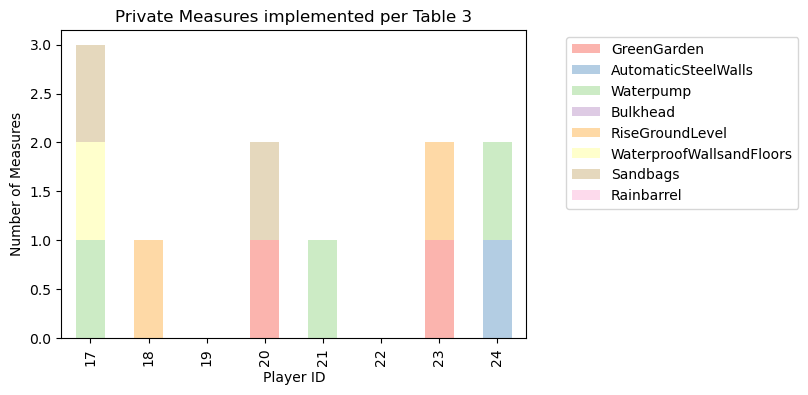

In [70]:
grouped_game3 = filtered_game3.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game3.plot(kind='bar', stacked=True, figsize=(6, 4),)
plt.title('Private Measures implemented per Table 3')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

In [74]:
# Example measures list
measures = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead',  
            'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']

# Example of generating a count of each measure implemented by player in each round
# This assumes binary (0 or 1) values for each measure indicating whether it was implemented
grouped_data3 = filtered_game3.groupby('PlayerID')[measures].sum()

In [75]:
# Initialize an empty dictionary to hold the round contributions
round_contributions = {}
for index, row in filtered_game3.iterrows():
    player_id = row['PlayerID']
    round_num = row['Round']
    for measure in measures:
        if row[measure] == 1:  # If the measure was implemented
            if (player_id, measure) not in round_contributions:
                round_contributions[(player_id, measure)] = f"R{round_num}"
            else:
                # Append the round number if the measure was implemented in multiple rounds
                round_contributions[(player_id, measure)] += f", R{round_num}"

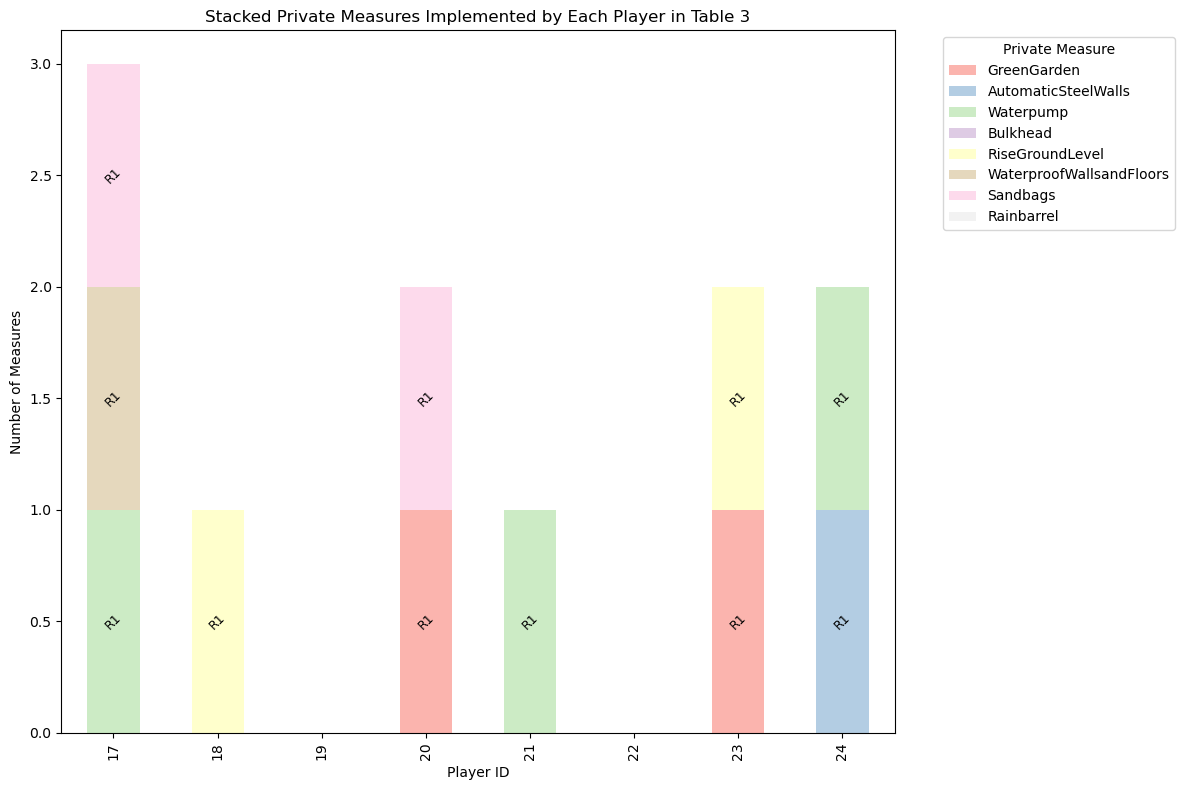

In [82]:

# Setting up the Pastel1 palette
sns.set_palette("Pastel1")

# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data3.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Table 3')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data3.columns and player_id in grouped_data3.index:
        cumulative_height_before_measure = grouped_data3.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data3.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Use grouped_data2 for consistency
        player_index = list(grouped_data3.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


the below data frame is all data with 
### `table 4`

In [80]:
filtered_game4 = private_measures[private_measures['Game'] == 4]
filtered_game4.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
78,4,25,4,1,0,0,0,1,0,0,1
77,4,25,3,1,0,0,0,0,0,0,0
79,4,25,5,0,0,0,0,0,0,0,0
75,4,25,1,0,0,0,0,0,0,0,1
76,4,25,2,0,0,0,0,0,0,0,0


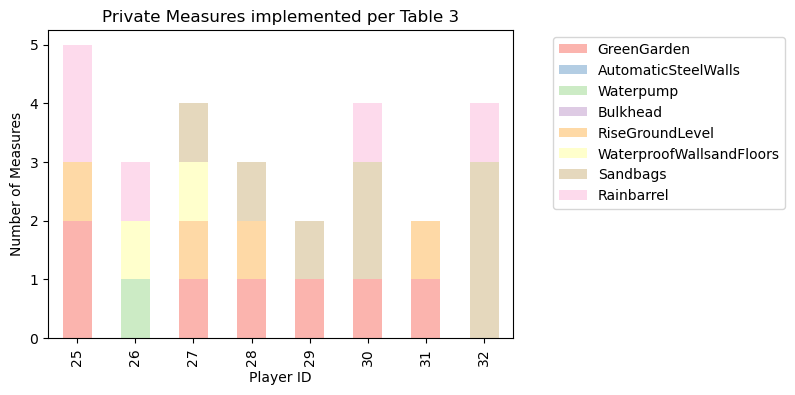

In [81]:
grouped_game3 = filtered_game4.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game4.plot(kind='bar', stacked=True, figsize=(6, 4),)
plt.title('Private Measures implemented per Table 3')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

In [83]:
# Example measures list
measures = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead',  
            'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']

# Example of generating a count of each measure implemented by player in each round
# This assumes binary (0 or 1) values for each measure indicating whether it was implemented
grouped_data4 = filtered_game4.groupby('PlayerID')[measures].sum()

In [84]:
# Initialize an empty dictionary to hold the round contributions
round_contributions = {}
for index, row in filtered_game4.iterrows():
    player_id = row['PlayerID']
    round_num = row['Round']
    for measure in measures:
        if row[measure] == 1:  # If the measure was implemented
            if (player_id, measure) not in round_contributions:
                round_contributions[(player_id, measure)] = f"R{round_num}"
            else:
                # Append the round number if the measure was implemented in multiple rounds
                round_contributions[(player_id, measure)] += f", R{round_num}"

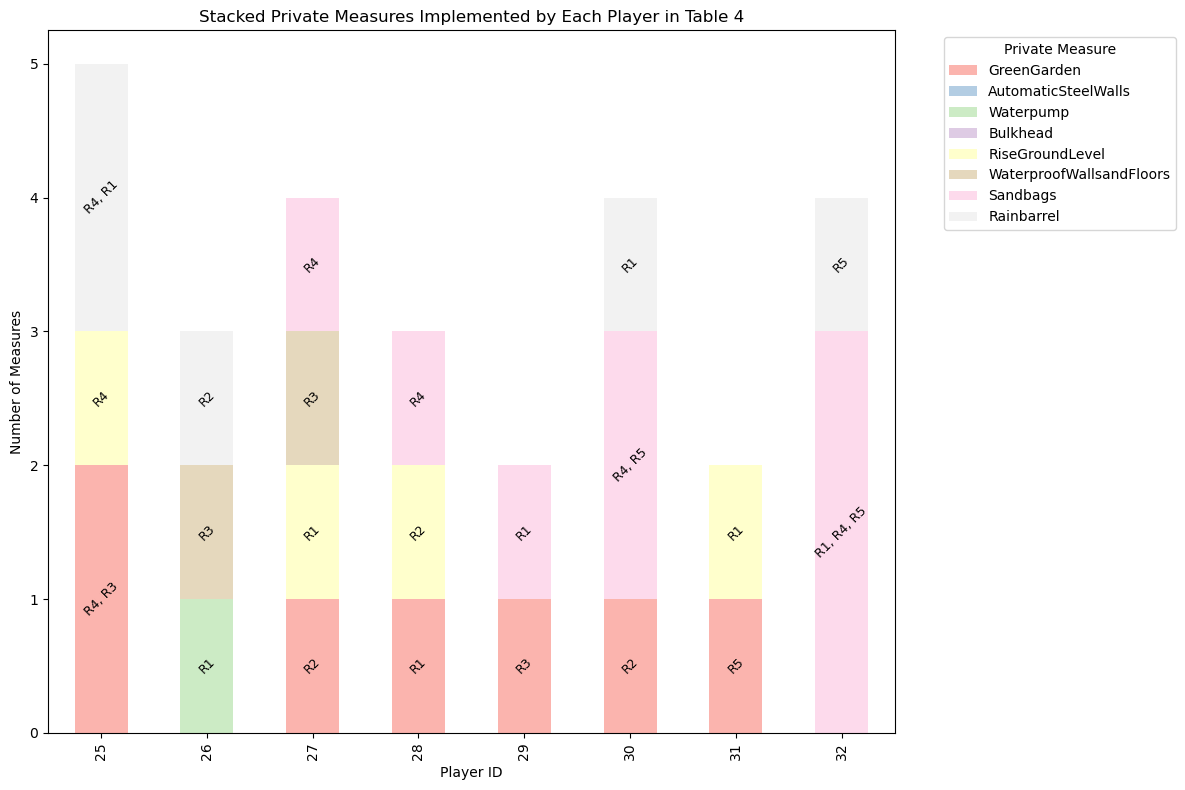

In [85]:

# Setting up the Pastel1 palette
sns.set_palette("Pastel1")

# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data4.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Table 4')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data4.columns and player_id in grouped_data4.index:
        cumulative_height_before_measure = grouped_data4.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data4.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Use grouped_data2 for consistency
        player_index = list(grouped_data4.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


the below data frame is all data with 
### `table 5`

In [86]:
filtered_game5 = private_measures[private_measures['Game'] == 5]
filtered_game5.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
118,5,33,4,1,0,0,0,1,0,0,0
117,5,33,3,0,0,1,0,0,0,0,0
119,5,33,5,0,0,0,0,0,0,0,0
115,5,33,1,0,0,0,0,0,0,1,0
116,5,33,2,0,0,0,0,0,0,0,0


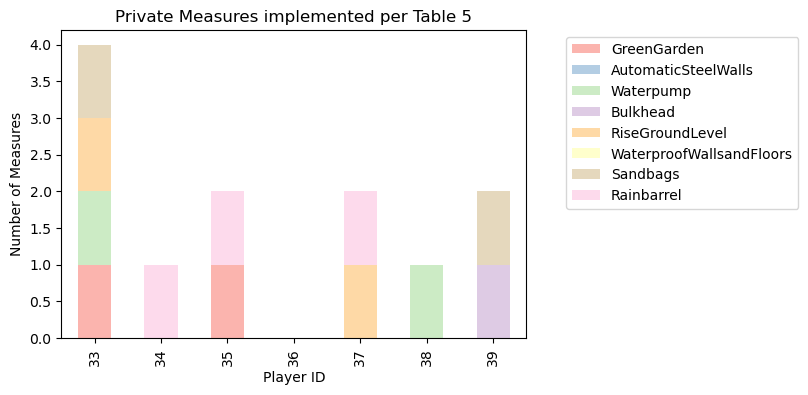

In [87]:
grouped_game5 = filtered_game5.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game5.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Private Measures implemented per Table 5')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

In [91]:
# Example measures list
measures = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead',  
            'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']

# Example of generating a count of each measure implemented by player in each round
# This assumes binary (0 or 1) values for each measure indicating whether it was implemented
grouped_data5 = filtered_game5.groupby('PlayerID')[measures].sum()

In [92]:
# Initialize an empty dictionary to hold the round contributions
round_contributions = {}
for index, row in filtered_game5.iterrows():
    player_id = row['PlayerID']
    round_num = row['Round']
    for measure in measures:
        if row[measure] == 1:  # If the measure was implemented
            if (player_id, measure) not in round_contributions:
                round_contributions[(player_id, measure)] = f"R{round_num}"
            else:
                # Append the round number if the measure was implemented in multiple rounds
                round_contributions[(player_id, measure)] += f", R{round_num}"

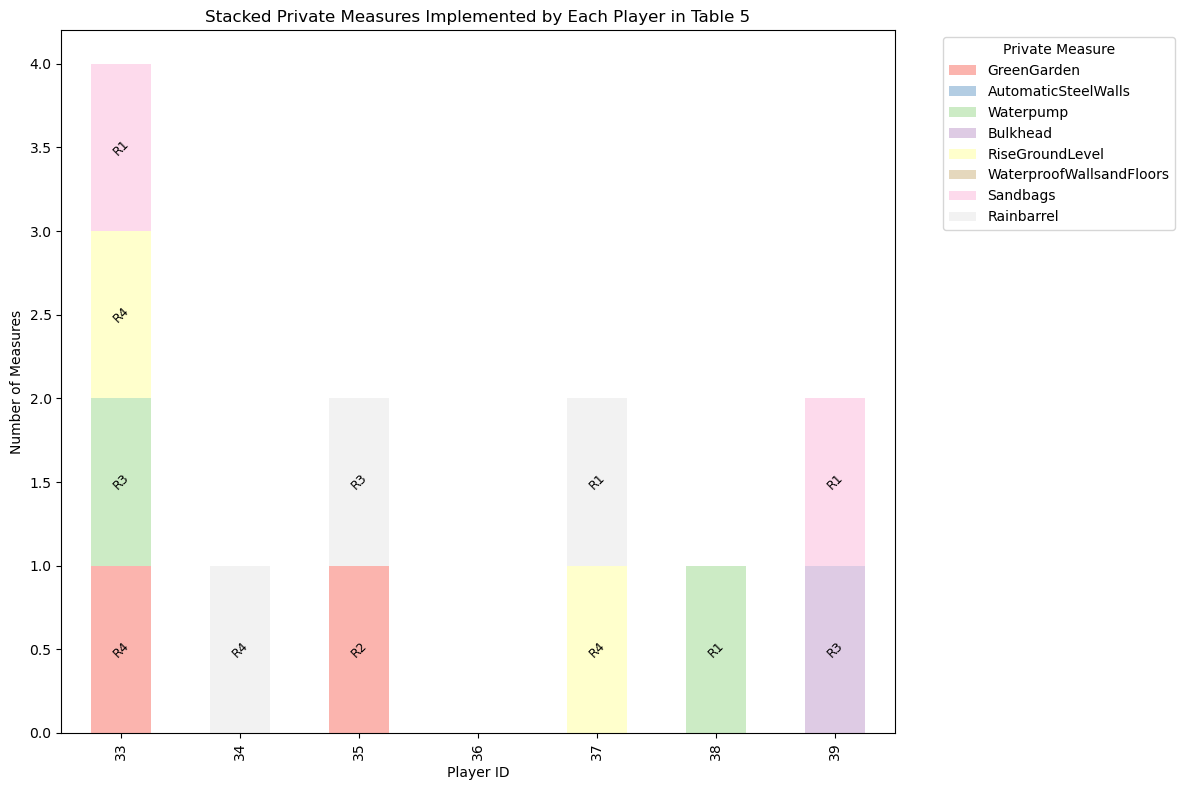

In [93]:

# Setting up the Pastel1 palette
sns.set_palette("Pastel1")

# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data5.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Table 5')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data5.columns and player_id in grouped_data5.index:
        cumulative_height_before_measure = grouped_data5.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data5.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Use grouped_data2 for consistency
        player_index = list(grouped_data5.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


the below data frame is all data with 
### `table 6`

In [100]:
filtered_game6 = private_measures[private_measures['Game'] == 6]
filtered_game6.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
150,6,40,1,0,1,0,0,0,0,0,0
151,6,40,2,0,0,1,1,0,0,0,0
152,6,40,3,0,0,0,0,0,0,1,0
153,6,40,4,0,0,0,0,0,0,0,0
154,6,40,5,0,0,0,0,1,1,0,0


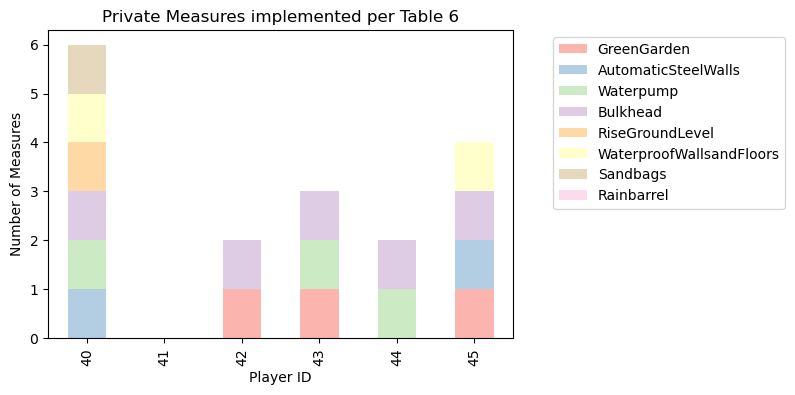

In [95]:
grouped_game6 = filtered_game6.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game6.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Private Measures implemented per Table 6')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

In [96]:
# Example measures list
measures = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead',  
            'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']

# Example of generating a count of each measure implemented by player in each round
# This assumes binary (0 or 1) values for each measure indicating whether it was implemented
grouped_data6 = filtered_game6.groupby('PlayerID')[measures].sum()

In [101]:
# Initialize an empty dictionary to hold the round contributions
round_contributions = {}
for index, row in filtered_game6.iterrows():
    player_id = row['PlayerID']
    round_num = row['Round']
    for measure in measures:
        if row[measure] == 1:  # If the measure was implemented
            if (player_id, measure) not in round_contributions:
                round_contributions[(player_id, measure)] = f"R{round_num}"
            else:
                # Append the round number if the measure was implemented in multiple rounds
                round_contributions[(player_id, measure)] += f", R{round_num}"

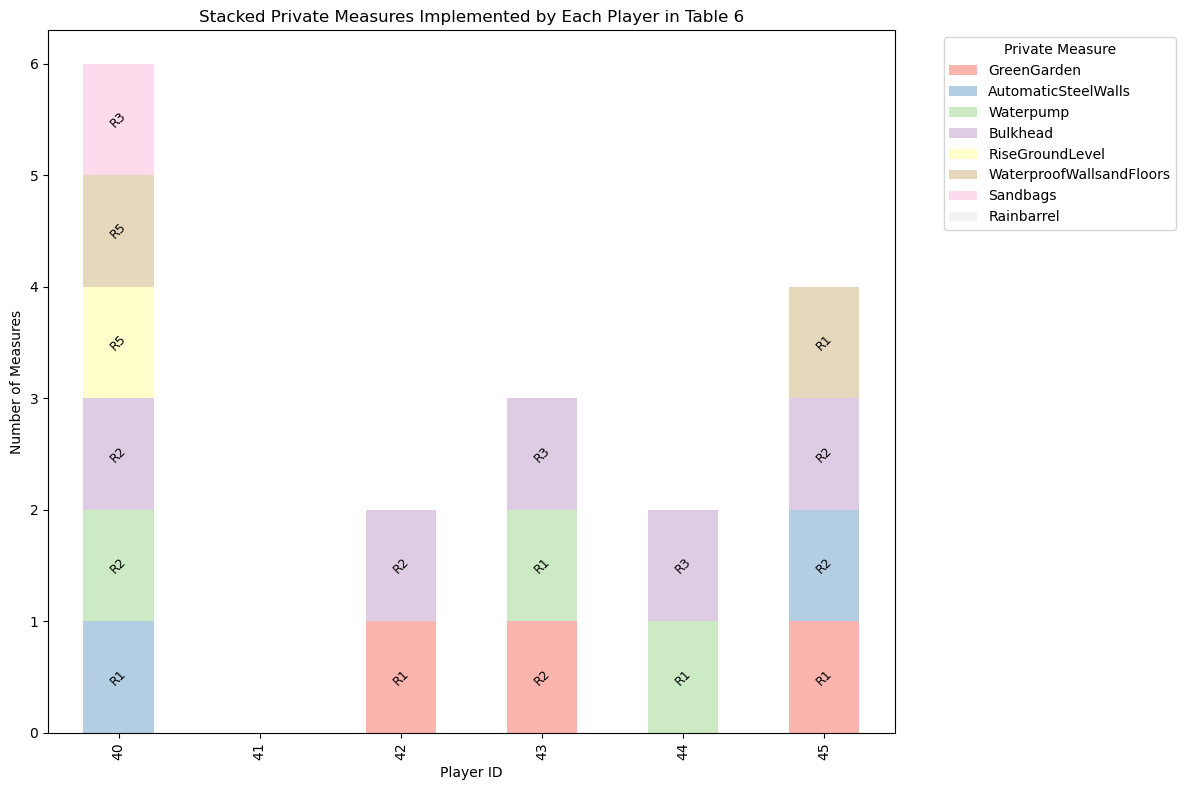

In [103]:

# Setting up the Pastel1 palette
sns.set_palette("Pastel1")

# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data6.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Table 6')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data6.columns and player_id in grouped_data6.index:
        cumulative_height_before_measure = grouped_data6.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data6.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Use grouped_data2 for consistency
        player_index = list(grouped_data6.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


the below data frame is all data with 
### `table 7`

In [104]:
filtered_game7 = private_measures[private_measures['Game'] == 7]
filtered_game7.head()

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
180,7,46,1,0,0,0,0,0,0,1,0
181,7,46,2,0,0,0,0,0,0,0,1
182,7,46,3,1,0,0,0,0,0,0,0
183,7,46,4,0,0,0,1,0,0,1,0
184,7,46,5,0,0,0,0,0,0,0,0


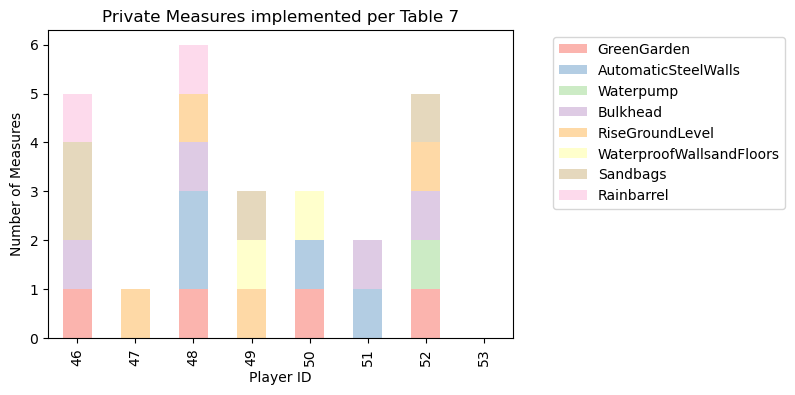

In [106]:
grouped_game7 = filtered_game7.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
grouped_game7.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Private Measures implemented per Table 7')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))  
plt.show()

In [107]:
# Example measures list
measures = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead',  
            'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']

# Example of generating a count of each measure implemented by player in each round
# This assumes binary (0 or 1) values for each measure indicating whether it was implemented
grouped_data7 = filtered_game7.groupby('PlayerID')[measures].sum()

In [108]:
# Initialize an empty dictionary to hold the round contributions
round_contributions = {}
for index, row in filtered_game7.iterrows():
    player_id = row['PlayerID']
    round_num = row['Round']
    for measure in measures:
        if row[measure] == 1:  # If the measure was implemented
            if (player_id, measure) not in round_contributions:
                round_contributions[(player_id, measure)] = f"R{round_num}"
            else:
                # Append the round number if the measure was implemented in multiple rounds
                round_contributions[(player_id, measure)] += f", R{round_num}"

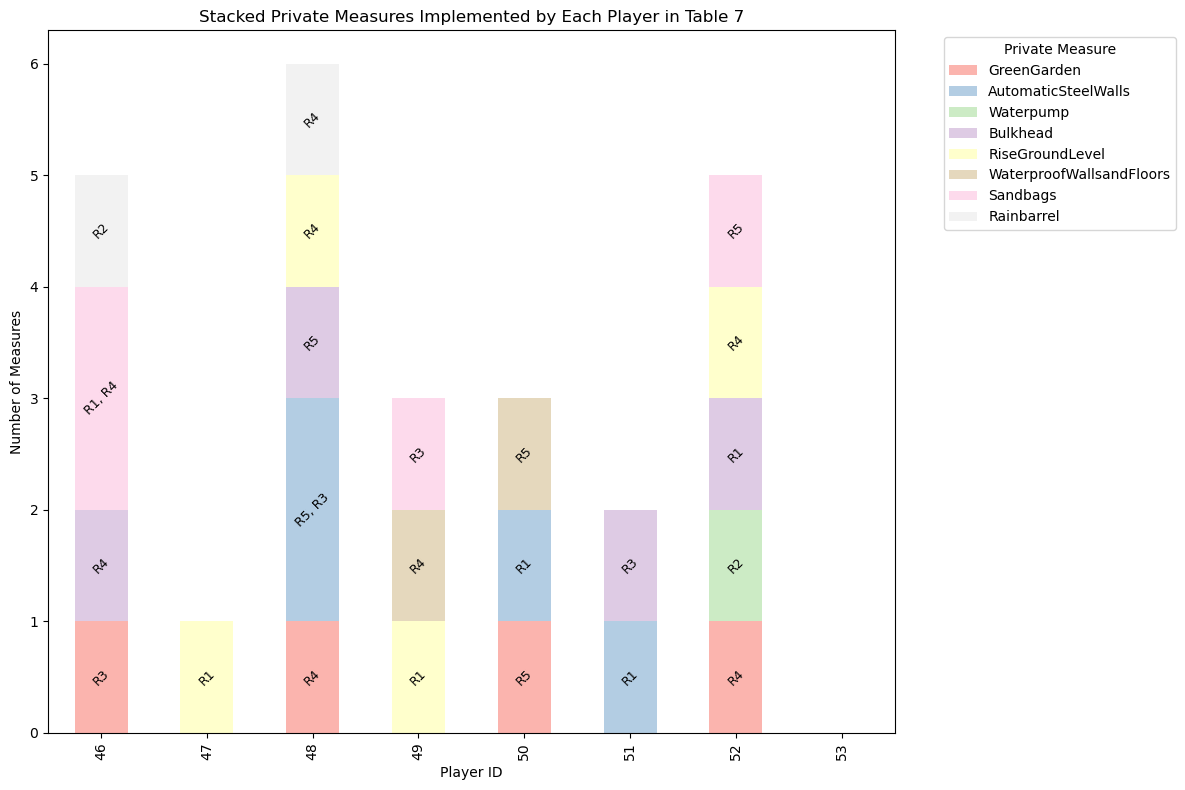

In [109]:

# Setting up the Pastel1 palette
sns.set_palette("Pastel1")

# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data7.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by Each Player in Table 7')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data7.columns and player_id in grouped_data7.index:
        cumulative_height_before_measure = grouped_data7.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data7.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Use grouped_data7 for consistency
        player_index = list(grouped_data7.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


below, Im proposing to have the whole players in a single plot
### `all players`


In [110]:
private_measures_overall = private_measures[['Game','PlayerID','Round','GreenGarden', 'AutomaticSteelWalls', 'Waterpump','Bulkhead','RiseGroundLevel','WaterproofWallsandFloors','Sandbags','Rainbarrel']]
private_measures_overall = private_measures.sort_values(by='Round', ascending=True)
private_measures_overall

,Game,PlayerID,Round,GreenGarden,AutomaticSteelWalls,Waterpump,Bulkhead,RiseGroundLevel,WaterproofWallsandFloors,Sandbags,Rainbarrel
0,1,1,1,0,0,0,0,1,0,0,0
145,5,39,1,0,0,0,0,0,0,1,0
75,4,25,1,0,0,0,0,0,0,0,1
40,2,10,1,1,0,0,0,1,0,0,0
140,5,38,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
134,5,36,5,0,0,0,0,0,0,0,0
189,7,47,5,0,0,0,0,0,0,0,0
194,7,48,5,0,1,0,1,0,0,0,0
119,5,33,5,0,0,0,0,0,0,0,0


In [111]:
# Example measures list
measures = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead',  
            'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']

# Example of generating a count of each measure implemented by player in each round
# This assumes binary (0 or 1) values for each measure indicating whether it was implemented
grouped_data_all = private_measures_overall.groupby('PlayerID')[measures].sum()

In [112]:
# Initialize an empty dictionary to hold the round contributions
round_contributions = {}
for index, row in private_measures_overall.iterrows():
    player_id = row['PlayerID']
    round_num = row['Round']
    for measure in measures:
        if row[measure] == 1:  # If the measure was implemented
            if (player_id, measure) not in round_contributions:
                round_contributions[(player_id, measure)] = f"R{round_num}"
            else:
                # Append the round number if the measure was implemented in multiple rounds
                round_contributions[(player_id, measure)] += f", R{round_num}"

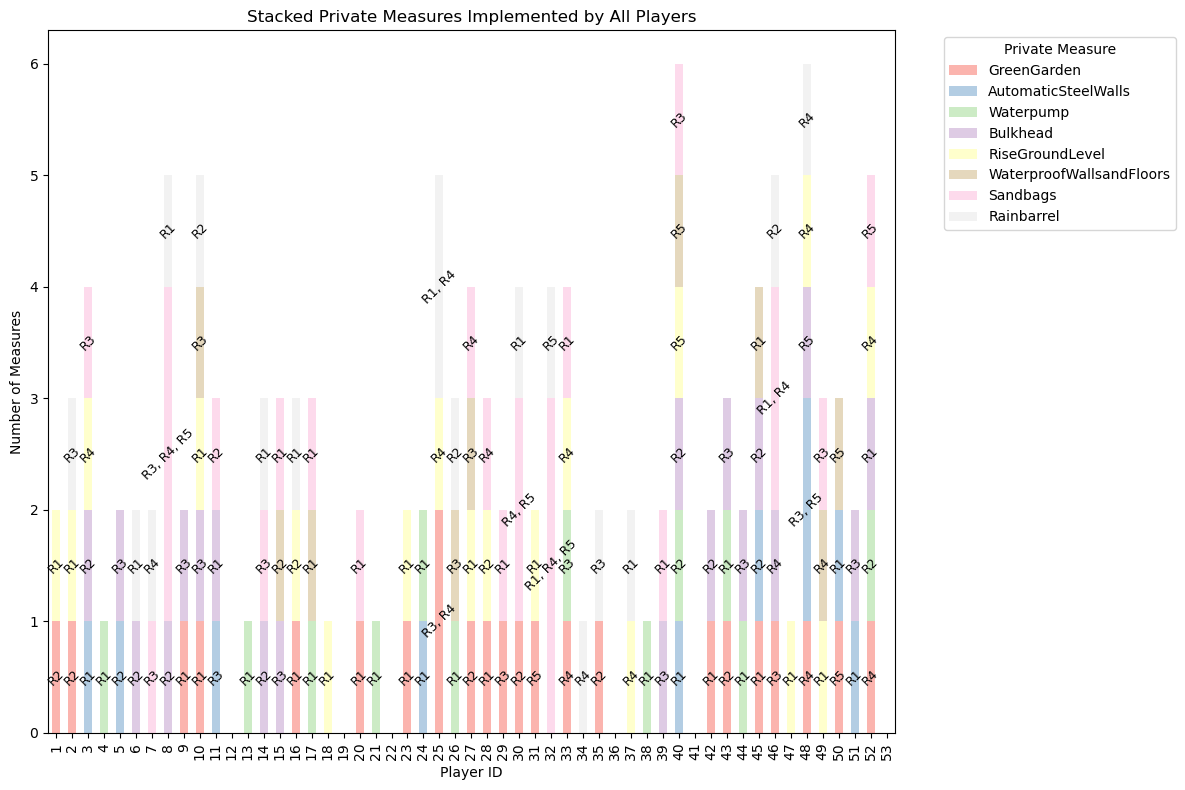

In [115]:

# Setting up the Pastel1 palette
sns.set_palette("Set3")

# Adjusting the plotting with the Pastel1 palette
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data_all.plot(kind='bar', stacked=True, ax=ax, colormap=sns.color_palette("Pastel1", as_cmap=True))

plt.title('Stacked Private Measures Implemented by All Players')
plt.xlabel('Player ID')
plt.ylabel('Number of Measures')
plt.legend(title='Private Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations as previously defined
for key, rounds in round_contributions.items():
    player_id, measure = key
    if measure in grouped_data_all.columns and player_id in grouped_data_all.index:
        cumulative_height_before_measure = grouped_data_all.loc[player_id, measures[:measures.index(measure)]].sum()
        measure_height = grouped_data_all.loc[player_id, measure]
        mid_point = cumulative_height_before_measure + measure_height / 2
        
        # Use grouped_data2 for consistency
        player_index = list(grouped_data_all.index).index(player_id)
        
        if measure_height > 0:  # Ensuring the segment is visible for annotation
            ax.text(player_index, mid_point, rounds, ha='center', va='center', color='black', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()


Not a very good idea! its messy and very little to read!

the following codes, belongs to previous attempts done to plot the bar charts with round number

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

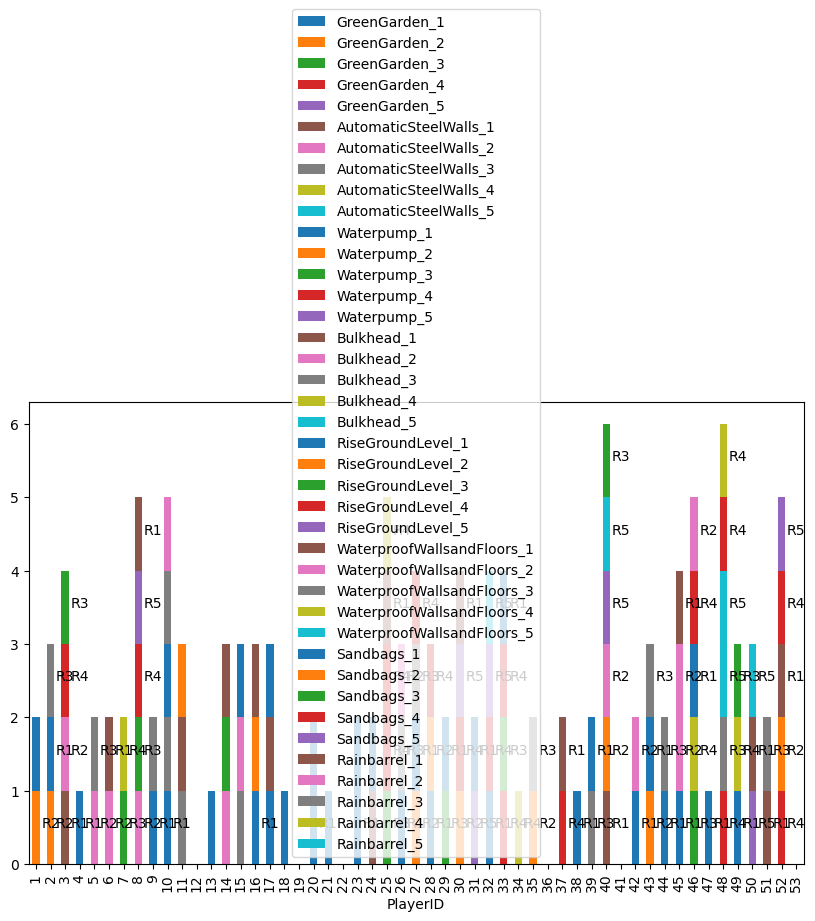

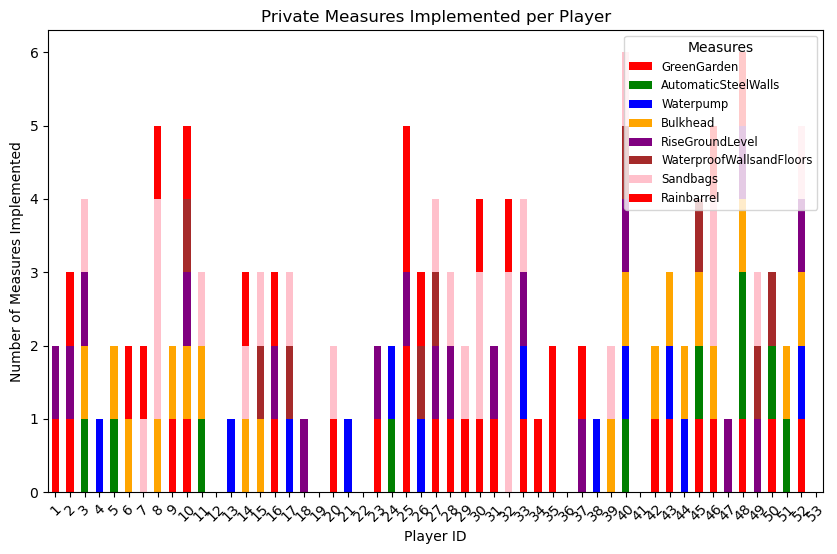

In [40]:

# Define a subset of columns for plotting (private measures implemented)
columns_to_plot = ['GreenGarden', 'AutomaticSteelWalls', 'Waterpump', 'Bulkhead', 
                   'RiseGroundLevel', 'WaterproofWallsandFloors', 'Sandbags', 'Rainbarrel']


# Group by PlayerID and sum the specified columns
grouped_game = private_measures_overall.groupby(['PlayerID', 'Round'])[columns_to_plot].sum().reset_index()

# Pivot the DataFrame to have rounds as columns for each player
pivoted_game = grouped_game.pivot(index='PlayerID', columns='Round', values=columns_to_plot)

# Flatten the MultiIndex columns after pivoting
pivoted_game.columns = ['_'.join(map(str, col)).strip() for col in pivoted_game.columns.values]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivoted_game.plot(kind='bar', stacked=True, ax=ax)

# Annotations
for idx, row in pivoted_game.iterrows():
    cumulative_height = 0
    for col in row.index:
        # Extract round number from column name (assuming format 'Measure_Round')
        round_num = col.split('_')[1]
        val = row[col]
        if val > 0:  # Only annotate non-zero values
            # Annotate on top of the stacked bar
            ax.text(idx, cumulative_height + val/2, f'R{round_num}', ha='center')
        cumulative_height += val

# Manually define a list of colors for each metric.
# Ensure this list has the same number of colors as the number of metrics you're plotting.
colors_for_metrics = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']  

# Group the data by 'PlayerID' and sum the specified metric columns
grouped_data = private_measures_overall.groupby('PlayerID')[columns_to_plot].sum()

# Plotting the stacked bar chart with the defined colors for 7 metrics
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors_for_metrics)

plt.title('Private Measures Implemented per Player')
plt.ylabel('Number of Measures Implemented')
plt.xlabel('Player ID')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.legend(loc='upper right', fontsize='small', title='Measures')

plt.show()

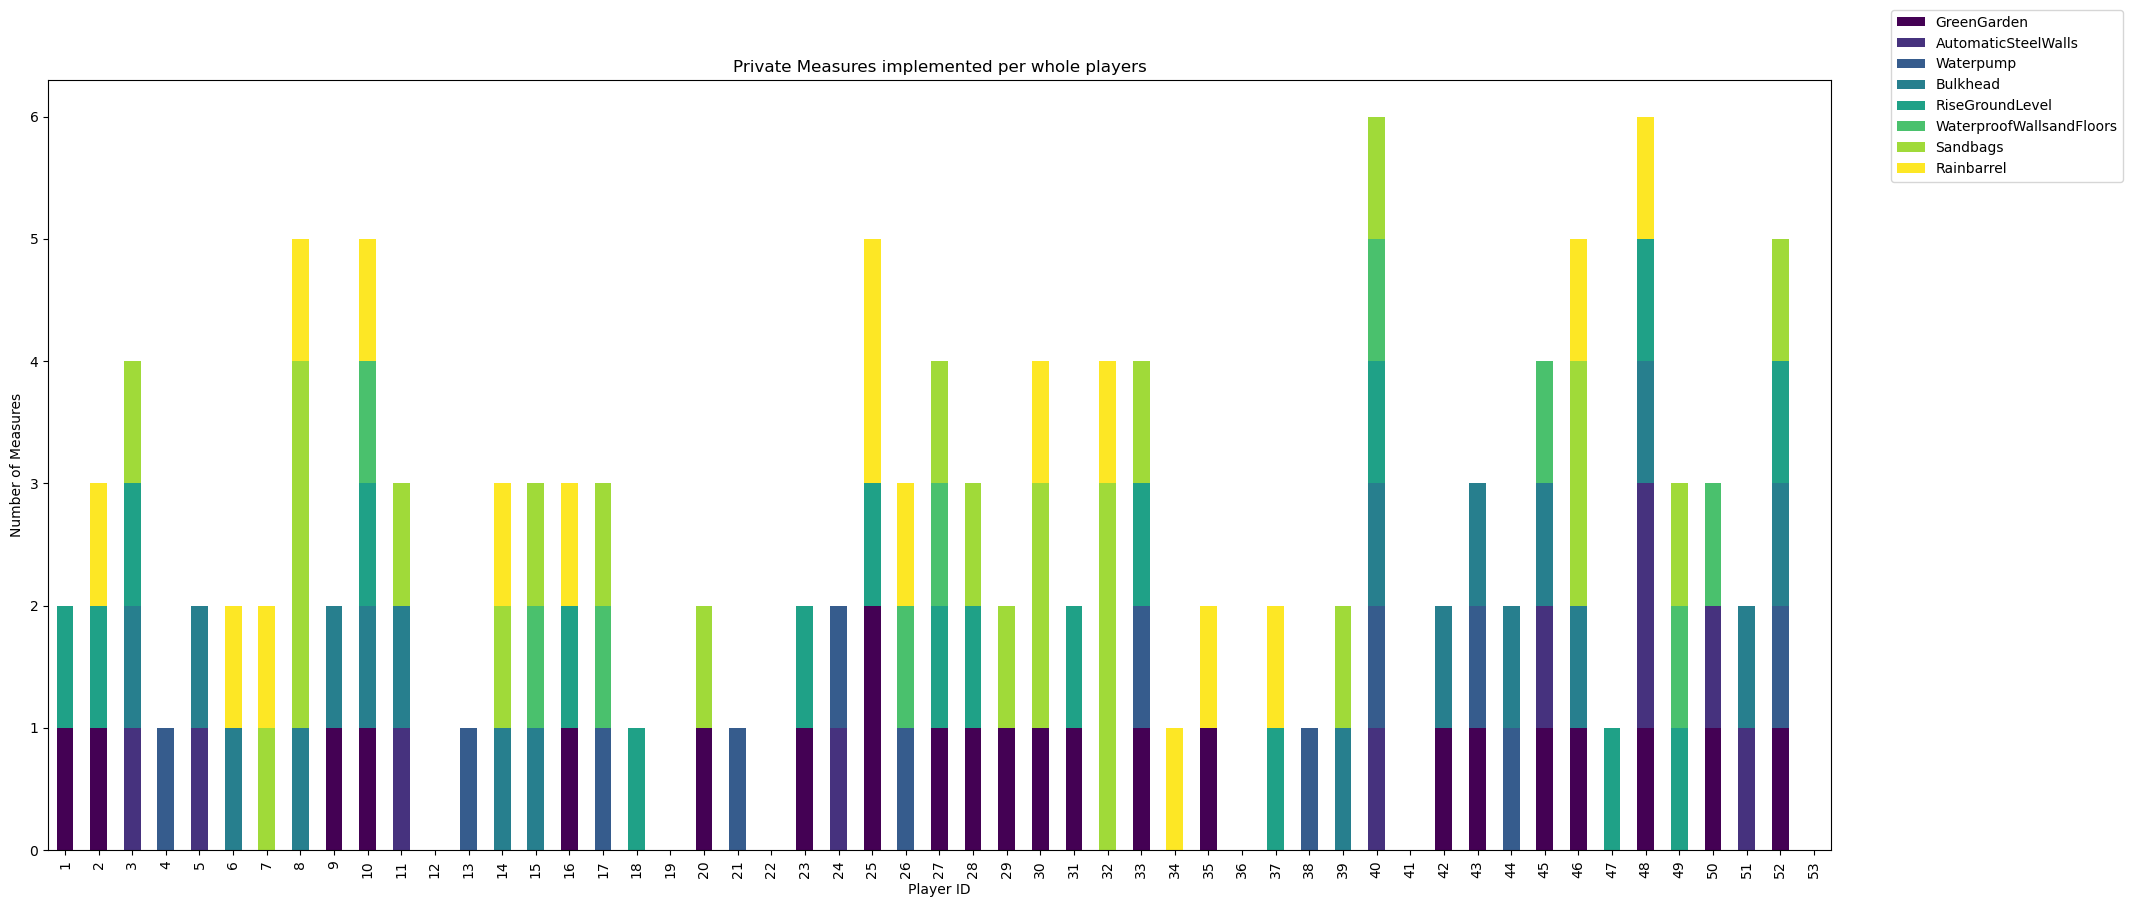

In [34]:
game_overall = private_measures_overall.groupby('PlayerID')[columns_to_replace].sum()

# Plotting the horizontal bar chart
game_overall.plot(kind='bar', stacked=True, figsize=(23, 10), cmap=cmap_overall_chart)

plt.title('Private Measures implemented per whole players')
plt.ylabel('Number of Measures')
plt.xlabel('Player ID')
plt.legend(loc='upper right', bbox_to_anchor=(1.168,1.1))  
plt.show()